# 1. Introduction

## OpenCV
OpenCV was started at Intel in 1999 by Gary Bradsky and the ﬁrst release came out in 2000. Vadim Pisarevsky joined Gary Bradsky to manage Intel’s Russian software OpenCV team. In 2005, OpenCV was used on Stanley, the vehiclewhowon2005DARPAGrandChallenge. LateritsactivedevelopmentcontinuedunderthesupportofWillow Garage,withGaryBradskyandVadimPisarevskyleadingtheproject. Rightnow,OpenCVsupportsalotofalgorithms related to Computer Vision and Machine Learning and it is expanding day-by-day. Currently OpenCV supports a wide variety of programming languages like C++, Python, Java etc and is available on differentplatformsincludingWindows,Linux,OSX,Android,iOSetc. Also,interfacesbasedonCUDAandOpenCL are also under active development for high-speed GPU operations. OpenCV-Python is the Python API of OpenCV. It combines the best qualities of OpenCV C++ API and Python language.

## OpenCV-Python
Python is a general purpose programming language started by Guido van Rossum, which became very popular in short time mainly because of its simplicity and code readability. It enables the programmer to express his ideas in fewer lines of code without reducing any readability. Compared to other languages like C/C++, Python is slower. But another important feature of Python is that it can be easily extended with C/C++. This feature helps us to write computationally intensive codes in C/C++ and create a Python wrapper for it so that we can use these wrappers as Python modules. This gives us two advantages: ﬁrst, our code is as fast as original C/C++ code (since it is the actual C++ code working in background) and second, it is very easy to code in Python. This is how OpenCV-Python works, it is a Python wrapper around original C++ implementation. AndthesupportofNumpymakesthetaskmoreeasier. Numpyisahighlyoptimizedlibraryfornumericaloperations. It gives a MATLAB-style syntax. All the OpenCV array structures are converted to-and-from Numpy arrays. So whatever operations you can do in Numpy, you can combine it with OpenCV, which increases number of weapons in your arsenal. Besides that, several other libraries like SciPy, Matplotlib which supports Numpy can be used with this. So OpenCV-Python is an appropriate tool for fast prototyping of computer vision problems.


# 2.GUI Features in OpenCV

## Getting Started with Images

### `Goals`

• Here, you will learn how to read an image, how to display it and how to save it back 

• You will learn these functions : `cv2.imread(),cv2.imshow(),cv2.imwrite()` 

• Optionally, you will learn how to display images with Matplotlib

### `Using OpenCV`

**Read an image**
Usethefunction cv2.imread() toread animage. The imageshouldbe intheworkingdirectoryor a fullpath ofimage should be given. Second argument is a ﬂag which speciﬁes the way image should be read. 

• cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default ﬂag. 

• cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode 

• cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

`Note: Instead of these three ﬂags, you can simply pass integers 1, 0 or -1 respectively.`

***`BGR in OpenCV, where as RGB in Others`***

**Display an image**

Use the function cv2.imshow() to display an image in a window. The window automatically ﬁts to the image size. First argument is a window name which is a string. second argument is our image. You can create as many windows as you wish, but with different window names.


In [1]:
import numpy as np 
import cv2
# Load an color image in grayscale 
img = cv2.imread('messi5.jpg',0)
cv2.imshow('image',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()


`cv2.waitKey()` is a keyboard binding function. Its argument is the time in milliseconds. The function waits for speciﬁed milliseconds for any keyboard event. **If you press any key in that time,the program continues. If 0 is passed, it waits indeﬁnitely for a key stroke. It can also be set to detect speciﬁc key strokes like, if key a is pressed etc which we will discuss below.** 

`cv2.destroyAllWindows()` simply destroys all the windows we created. If you want to destroy any speciﬁc window, use the functioncv2.destroyWindow()where you pass the exact window name as the argument.

**Write an image**

Use the function `cv2.imwrite()` to save an image. First argument is the ﬁle name, second argument is the image you want to save.
`cv2.imwrite('messigray.png',img)`

This will save the image in PNG format in the working directory.

Below program loads an image in grayscale,displays it,save the image if you press‘s’ and exit,or simply exit without saving if you press ESC key.


In [5]:
import numpy as np 
import cv2
img = cv2.imread('messi5.jpg',0) 
cv2.imshow('image',img) 
k = cv2.waitKey(0) 
if k == 27: 
    # wait for ESC key to exit 
    cv2.destroyAllWindows() 
elif k == ord('s'): 
    # wait for 's' key to save and exit 
    cv2.imwrite('messigray.png',img) 
    cv2.destroyAllWindows()


`Warning: If you are using a 64-bitmachine, you will have to modify k = cv2.waitKey(0) lineasfollows: k = cv2.waitKey(0) & 0xFF`

### `Using Matplotlib`

Matplotlib is a plotting library for Python which gives you wide variety of plotting methods. You will see them in coming articles. Here, you will learn how to display image with Matplotlib. You can zoom images, save it etc using Matplotlib.


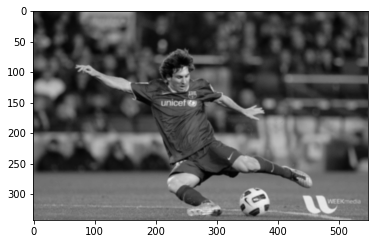

In [8]:
%matplotlib inline
import numpy as np 
import cv2 
from matplotlib import pyplot as plt
img = cv2.imread('messi5.jpg',0) 
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') 
plt.show()


## Getting Started with Videos

### `Goal`

* Learn to read video, display video and save video.
* Learn to capture from Camera and display it.
* You will learn these functions : cv2.VideoCapture(), cv2.VideoWriter()

### `Capture Video from Camera`

Often, we have to capture live stream with camera. OpenCV provides a very simple interface to this. Let's capture a video from the camera (I am using the in-built webcam of my laptop), convert it into grayscale video and display it. Just a simple task to get started.

To capture a video, you need to create a VideoCapture object. Its argument can be either the device index or the name of a video file. Device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0 (or -1). You can select the second camera by passing 1 and so on. After that, you can capture frame-by-frame. But at the end, don't forget to release the capture.

`cap.read()` returns a bool `(True/False)`. If frame is read correctly, it will be True. So you can check end of the video by checking this return value.

Sometimes, cap may not have initialized the capture. In that case, this code shows error. You can check whether it is initialized or not by the method `cap.isOpened()`. If it is True, OK. Otherwise open it using `cap.open()`.

You can also access some of the features of this video using cap.get(propId) method where propId is a number from 0 to 18. Each number denotes a property of the video (if it is applicable to that video) and full details can be seen here: `cv::VideoCapture::get()`. Some of these values can be modified using `cap.set(propId, value)`. Value is the new value you want.

For example, I can check the frame width and height by `cap.get(cv2.CAP_PROP_FRAME_WIDTH)` and `cap.get(cv2.CAP_PROP_FRAME_HEIGHT)`. It gives me `640x480 by default`. But I want to `modify it to 320x240`. Just use `ret = cap.set(cv2.CAP_PROP_FRAME_WIDTH,320)` and `ret = cap.set(cv2.CAP_PROP_FRAME_HEIGHT,240)`.



In [2]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

**`Press q to exit`**

### `Playing Video from file`

It is same as capturing from Camera, just change camera index with video file name. Also while displaying the frame, use appropriate time for cv2.waitKey(). If it is too less, video will be very fast and if it is too high, video will be slow (Well, that is how you can display videos in slow motion). 25 milliseconds will be OK in normal cases.

In [3]:
import numpy as np
import cv2
cap = cv2.VideoCapture('vtest.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### `Saving a Video`

So we capture a video, process it frame-by-frame and we want to save that video. For images, it is very simple, just use cv2.imwrite(). Here a little more work is required.

This time we create a VideoWriter object. We should specify the output file name (eg: `output.avi`). Then we should specify the FourCC code (details in next paragraph). Then number of frames per second (`fps`) and `frame size` should be passed. And last one is `isColor flag`. If it is True, encoder expect color frame, otherwise it works with grayscale frame.

FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. Following codecs works fine for me.

* In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
* In Windows: DIVX (More to be tested and added)
* In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).

FourCC code is passed as `cv2.VideoWriter_fourcc('M','J','P','G')`or `cv2.VideoWriter_fourcc(*'MJPG')` for MJPG.

Below code capture from a Camera, flip every frame in vertical direction and saves it.

#### flip img horizontally, vertically, and both axes with flip()
horizontal_img = cv2.flip( img, 0 )

vertical_img = cv2.flip( img, 1 )

both_img = cv2.flip( img, -1 )

In [13]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,1)
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

## Drawing Functions in OpenCV

### `Goal`

* Learn to draw different geometric shapes with OpenCV
* You will learn these functions : cv2.line(), cv2.circle() , cv2.rectangle(), cv2.ellipse(), cv2.putText() etc.

### `Code`

In all the above functions, you will see some common arguments as given below:

* img : The image where you want to draw the shapes
* color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.
* thickness : Thickness of the line or circle etc. If **-1** is passed for closed figures like circles, it will fill the shape. default thickness = 1
* lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv2.LINE_AA gives anti-aliased line which looks great for curves.

### `Drawing Line`

To draw a line, you need to pass starting and ending coordinates of line. We will create a black image and draw a blue line on it from top-left to bottom-right corners.

In [15]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.imshow('image',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### `Drawing Rectangle`

To draw a rectangle, you need top-left corner and bottom-right corner of rectangle. This time we will draw a green rectangle at the top-right corner of image.

In [16]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv2.imshow('image',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### `Drawing Circle`

To draw a circle, you need its center coordinates and radius. We will draw a circle inside the rectangle drawn above.

In [17]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
cv2.circle(img,(447,63), 63, (0,0,255), -1)
cv2.imshow('image',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### `Drawing Ellipse`

To draw the ellipse, we need to pass several arguments. One argument is the center location (x,y). Next argument is axes lengths (major axis length, minor axis length). angle is the angle of rotation of ellipse in anti-clockwise direction. startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction from major axis. i.e. giving values 0 and 360 gives the full ellipse. For more details, check the documentation of cv2.ellipse(). Below example draws a half ellipse at the center of the image.

In [ ]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
cv2.imshow('image',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### `Drawing Polygon`

To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32. Here we draw a small polygon of with four vertices in yellow color.

In [18]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))
cv2.imshow('image',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

**`Note`**
If third argument is False, you will get a polylines joining all the points, not a closed shape.
cv2.polylines() can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function. All lines will be drawn individually. It is a much better and faster way to draw a group of lines than calling cv2.line() for each line

### `Adding Text to Images`

To put texts in images, you need specify following things.

* Text data that you want to write
* Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
* Font type (Check cv2.putText() docs for supported fonts)
* Font Scale (specifies the size of font)
* regular things like color, thickness, lineType etc. For better look, lineType = cv2.LINE_AA is recommended.

We will write OpenCV on our image in white color.

In [1]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
cv2.imshow('image',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

## Mouse as a Paint-Brush

### `Goal`

* Learn to handle mouse events in OpenCV
* You will learn these functions : cv2.setMouseCallback()

### `Simple Demo`

Here, we create a simple application which draws a circle on an image wherever we double-click on it.

First we create a mouse callback function which is executed when a mouse event take place. Mouse event can be anything related to mouse like left-button down, left-button up, left-button double-click etc. It gives us the coordinates (x,y) for every mouse event. With this event and location, we can do whatever we like. To list all available events available, run the following code in Python terminal:

In [20]:
import cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


Creating mouse callback function has a specific format which is same everywhere. It differs only in what the function does. So our mouse callback function does one thing, it draws a circle where we double-click. So see the code below. Code is self-explanatory from comments :

In [21]:
import cv2
import numpy as np
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()


### `More Advanced Demo`

Now we go for a much better application. In this, we draw either rectangles or circles (depending on the mode we select) by dragging the mouse like we do in Paint application. So our mouse callback function has two parts, one to draw rectangle and other to draw the circles. This specific example will be really helpful in creating and understanding some interactive applications like object tracking, image segmentation etc.

In [26]:
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

## Trackbar as the Color Palette

### `Goal`

* Learn to bind trackbar to OpenCV windows
* You will learn these functions : cv2.getTrackbarPos(), cv2.createTrackbar() etc.

### `Code Demo`

Here we will create a simple application which shows the color you specify. You have a window which shows the color and three trackbars to specify each of B,G,R colors. You slide the trackbar and correspondingly window color changes. By default, initial color will be set to Black.

For `cv2.getTrackbarPos()` function, first argument is the trackbar name, second one is the window name to which it is attached, third argument is the default value, fourth one is the maximum value and fifth one is the callback function which is executed everytime trackbar value changes. The callback function always has a default argument which is the trackbar position. In our case, function does nothing, so we simply pass.

Another important application of trackbar is to use it as a button or switch. OpenCV, by default, doesn't have button functionality. So you can use trackbar to get such functionality. In our application, we have created one switch in which application works only if switch is ON, otherwise screen is always black.


In [28]:
import cv2
import numpy as np
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()

# 3. Core Operations

## Basic Operations on Images

### `Goal`

Learn to:

* Access pixel values and modify them
* Access image properties
* Setting Region of Interest (ROI)
* Splitting and Merging images

Almost all the operations in this section is mainly related to Numpy rather than OpenCV. A good knowledge of Numpy is required to write better optimized code with OpenCV.

### `Accessing and Modifying pixel values`

Let's load a color image first:


In [29]:
import cv2
import numpy as np
img = cv2.imread('messi5.jpg')

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [31]:
px = img[100,100]
print( px )
# accessing only blue pixel
blue = img[100,100,0] # BGR format
print( blue )

[156 166 200]
156


You can modify the pixel values the same way

In [32]:
img[100,100] = [255,255,255]
print( img[100,100] )

[255 255 255]


### `Accessing Image Properties`

Image properties include number of rows, columns and channels, type of image data, number of pixels etc.

The shape of an image is accessed by img.shape. It returns a tuple of number of rows, columns, and channels (if image is color):


If an image is grayscale, the tuple returned contains only the number of rows and columns, so it is a good method to check whether the loaded image is grayscale or color.

In [33]:
print( img.shape )

(342, 548, 3)


In [34]:
#Total number of pixels is accessed by img.size:
print( img.size )

562248


In [35]:
#Image datatype is obtained by `img.dtype`:
print( img.dtype )

uint8


### `Image ROI`

Sometimes, you will have to play with certain region of images. For eye detection in images, first face detection is done all over the image. When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search in a small area).

ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

In [37]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
cv2.imshow('image',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### `Splitting and Merging Image Channels`

Sometimes you will need to work separately on B,G,R channels of image. In this case, you need to split the BGR images to single channels. In other cases, you may need to join these individual channels to a BGR image. You can do it simply by:

In [38]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

In [40]:
# or
b = img[:,:,0]

In [41]:
# Suppose you want to set all the red pixels to zero, you do not need to split the channels first. Numpy indexing is faster:
img[:,:,2] = 0


### `Making Borders for Images (Padding)`

If you want to create a border around the image, something like a photo frame, you can use cv2.copyMakeBorder(). But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

* src - input image
* top, bottom, left, right - border width in number of pixels in corresponding directions
* borderType - Flag defining what kind of border to be added. It can be following types:
    * cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
        * cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
        * cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
        * cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
        * cv2.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
* value - Color of border if border type is cv2.BORDER_CONSTANT

Below is a sample code demonstrating all these border types for better understanding:

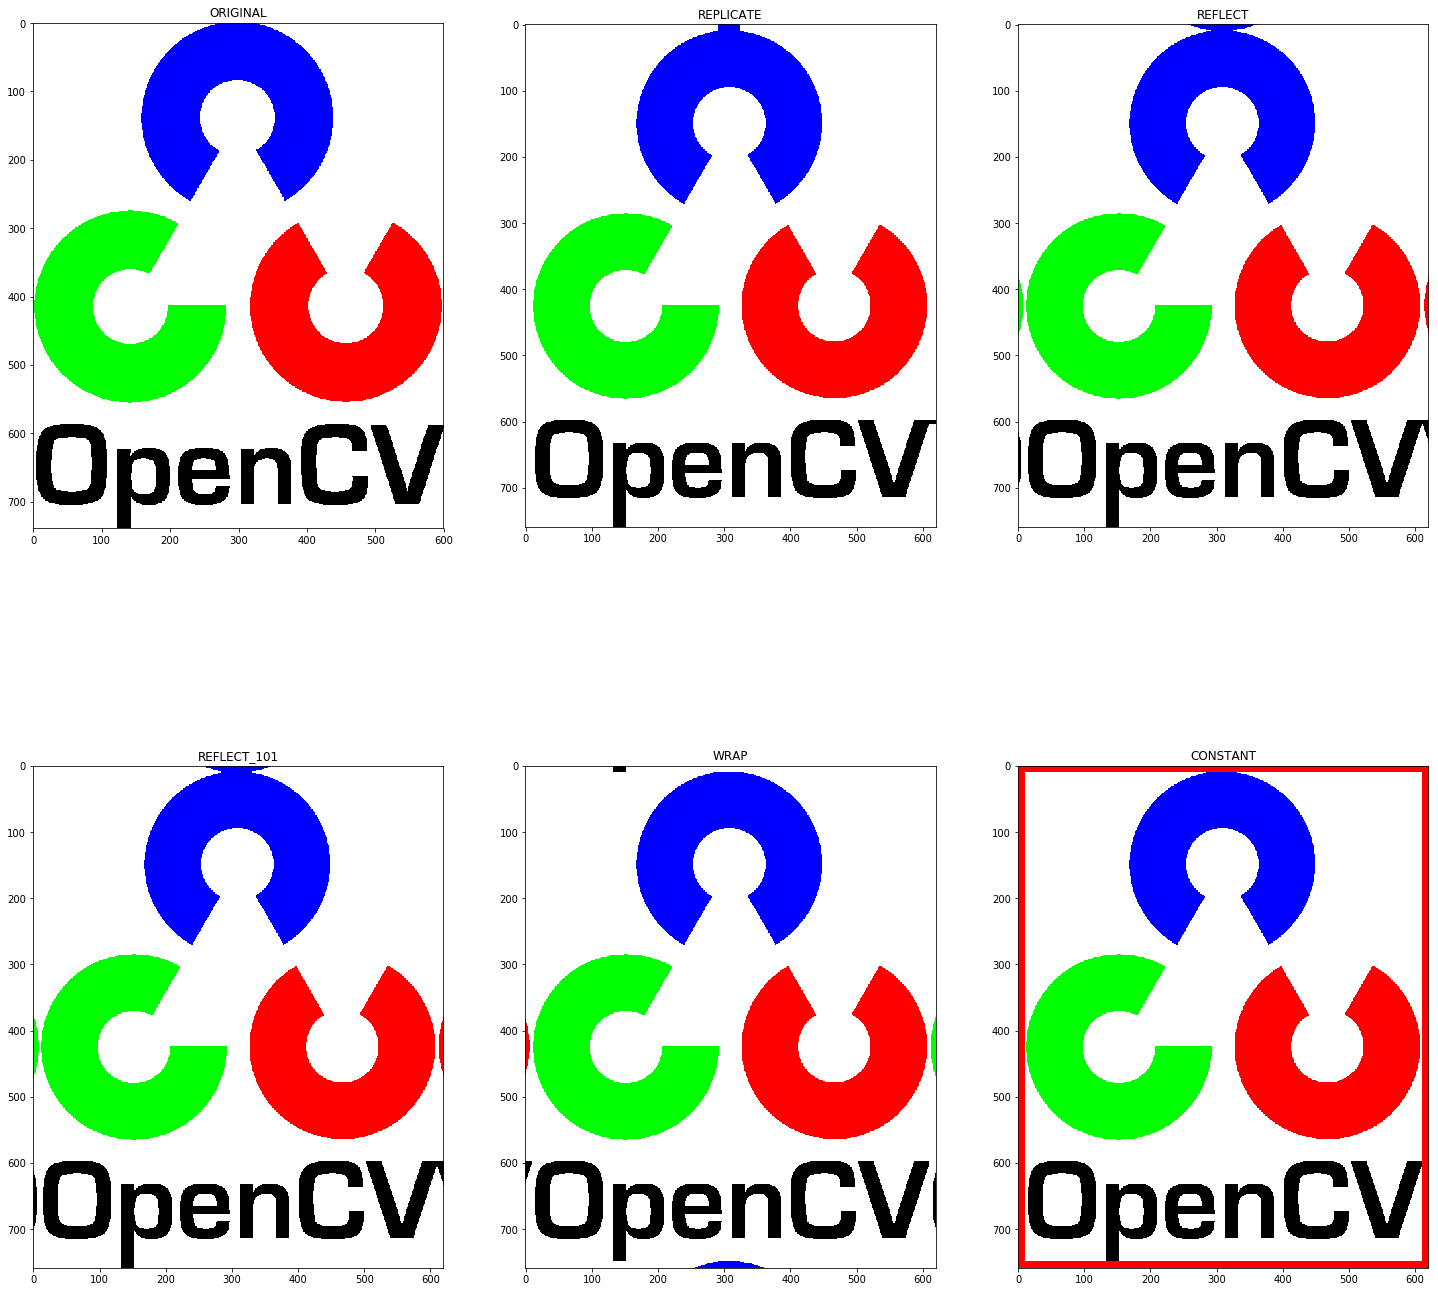

In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv2.imread('opencv-logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.figure(figsize=(25,25))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

## Arithmetic Operations on Images

### `Goal`

* Learn several arithmetic operations on images like addition, subtraction, bitwise operations etc.

* You will learn these functions : cv2.add(), cv2.addWeighted() etc.

### `Image Addition`

You can add two images by OpenCV function, cv2.add() or simply by numpy operation, res = img1 + img2. Both images should be of same depth and type, or second image can just be a scalar value.

#### `Note`
There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.
For example, consider below sample:

In [3]:
x = np.uint8([250])
y = np.uint8([10])
print( cv2.add(x,y) ) # 250+10 = 260 => 255
print( x+y )          # 250+10 = 260 % 256 = 4

[[255]]
[4]


It will be more visible when you add two images. OpenCV function will provide a better result. So always better stick to OpenCV functions.

### `Image Blending`

This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency. Images are added as per the equation below:

`g(x)=(1−α)f0(x)+αf1(x)`

By varying α from 0→1, you can perform a cool transition between one image to another.

Here I took two images to blend them together. First image is given a weight of 0.7 and second image is given 0.3. cv2.addWeighted() applies following equation on the image.

`dst=α⋅img1+β⋅img2+γ`

Here γ is taken as zero.

In [6]:
import cv2
img1 = cv2.imread('ml.png')
img2 = cv2.imread('opencv-logo.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## `Bitwise Operations`

This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc. Below we will see an example on how to change a particular region of an image.

I want to put OpenCV logo above an image. If I add two images, it will change color. If I blend it, I get an transparent effect. But I want it to be opaque. If it was a rectangular region, I could use ROI as we did in last chapter. But OpenCV logo is a not a rectangular shape. So you can do it with bitwise operations as below:

In [8]:
# Load two images
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('opencv-logo1.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4.Image Processing in OpenCV

## Changing Colorspaces

### `Goal`

* In this tutorial, you will learn how to convert images from one color-space to another, like BGR ↔ Gray, BGR ↔ HSV etc.
* In addition to that, we will create an application which extracts a colored object in a video
* You will learn following functions : cv2.cvtColor(), cv2.inRange() etc.

### `Changing Color-space`

There are more than 150 color-space conversion methods available in OpenCV. But we will look into only two which are most widely used ones, BGR ↔ Gray and BGR ↔ HSV.

For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.

For BGR → Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR → HSV, we use the flag cv2.COLOR_BGR2HSV. To get other flags, just run following commands in your Python terminal :

In [9]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR

#### `Note`

For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

### `Object Tracking`

Now we know how to convert BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier to represent a color than in BGR color-space. In our application, we will try to extract a blue colored object. So here is the method:

* Take each frame of the video
* Convert from BGR to HSV color-space
* We threshold the HSV image for a range of blue color
* Now extract the blue object alone, we can do whatever on that image we want.

Below is the code which are commented in detail :

In [10]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

### `How to find HSV values to track?`

This is a common question found in stackoverflow.com. It is very simple and you can use the same function, cv2.cvtColor(). Instead of passing an image, you just pass the BGR values you want. For example, to find the HSV value of Green, try following commands in Python terminal:

In [12]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively. Apart from this method, you can use any image editing tools like GIMP or any online converters to find these values, but don't forget to adjust the HSV ranges

## Geometric Transformations of Images

### `Goals`

Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.
You will see these functions: cv2.getPerspectiveTransform
Transformations

OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective, with which you can have all kinds of transformations. cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input.

### `Scaling`

Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes. You can resize an input image either of following methods:

In [14]:
import cv2
import numpy as np
img = cv2.imread('messi5.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#OR
#height, width = img.shape[:2]
#res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imshow('image',res) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

### `Translation`

Translation is the shifting of object's location. If you know the shift in (x,y) direction, let it be (tx,ty), you can create the transformation matrix M as follows:

You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function. See below example for a shift of (100,50):

In [15]:
import cv2
import numpy as np
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### `warning`

Third argument of the cv2.warpAffine() function is the size of the output image, which should be in the form of **(width, height)**. Remember width = number of columns, and height = number of rows.

Rotation

Rotation of an image for an angle θ is achieved by the transformation matrix (M) of the form

\begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}

where:

\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}

To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D. Check below example which rotates the image by 90 degree with respect to center without any scaling.

In [17]:
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### `Affine Transformation`

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

Check below example, and also look at the points I selected (which are marked in Green color):

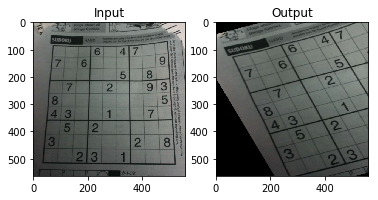

In [23]:
img = cv2.imread('sudoku.png')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### `Perspective Transformation`

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

See the code below:

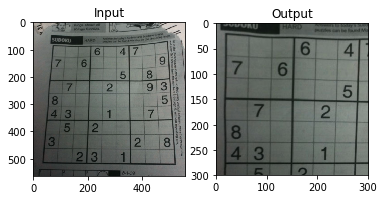

In [24]:
img = cv2.imread('sudoku.png')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Image Thresholding

### `Goal`

* In this tutorial, you will learn Simple thresholding, Adaptive thresholding, Otsu's thresholding etc.
* You will learn these functions : cv2.threshold, cv2.adaptiveThreshold etc.

### `Simple Thresholding`

Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

Documentation clearly explain what each type is meant for. Please check out the documentation.

Two outputs are obtained. First one is a retval which will be explained later. Second output is our thresholded image.

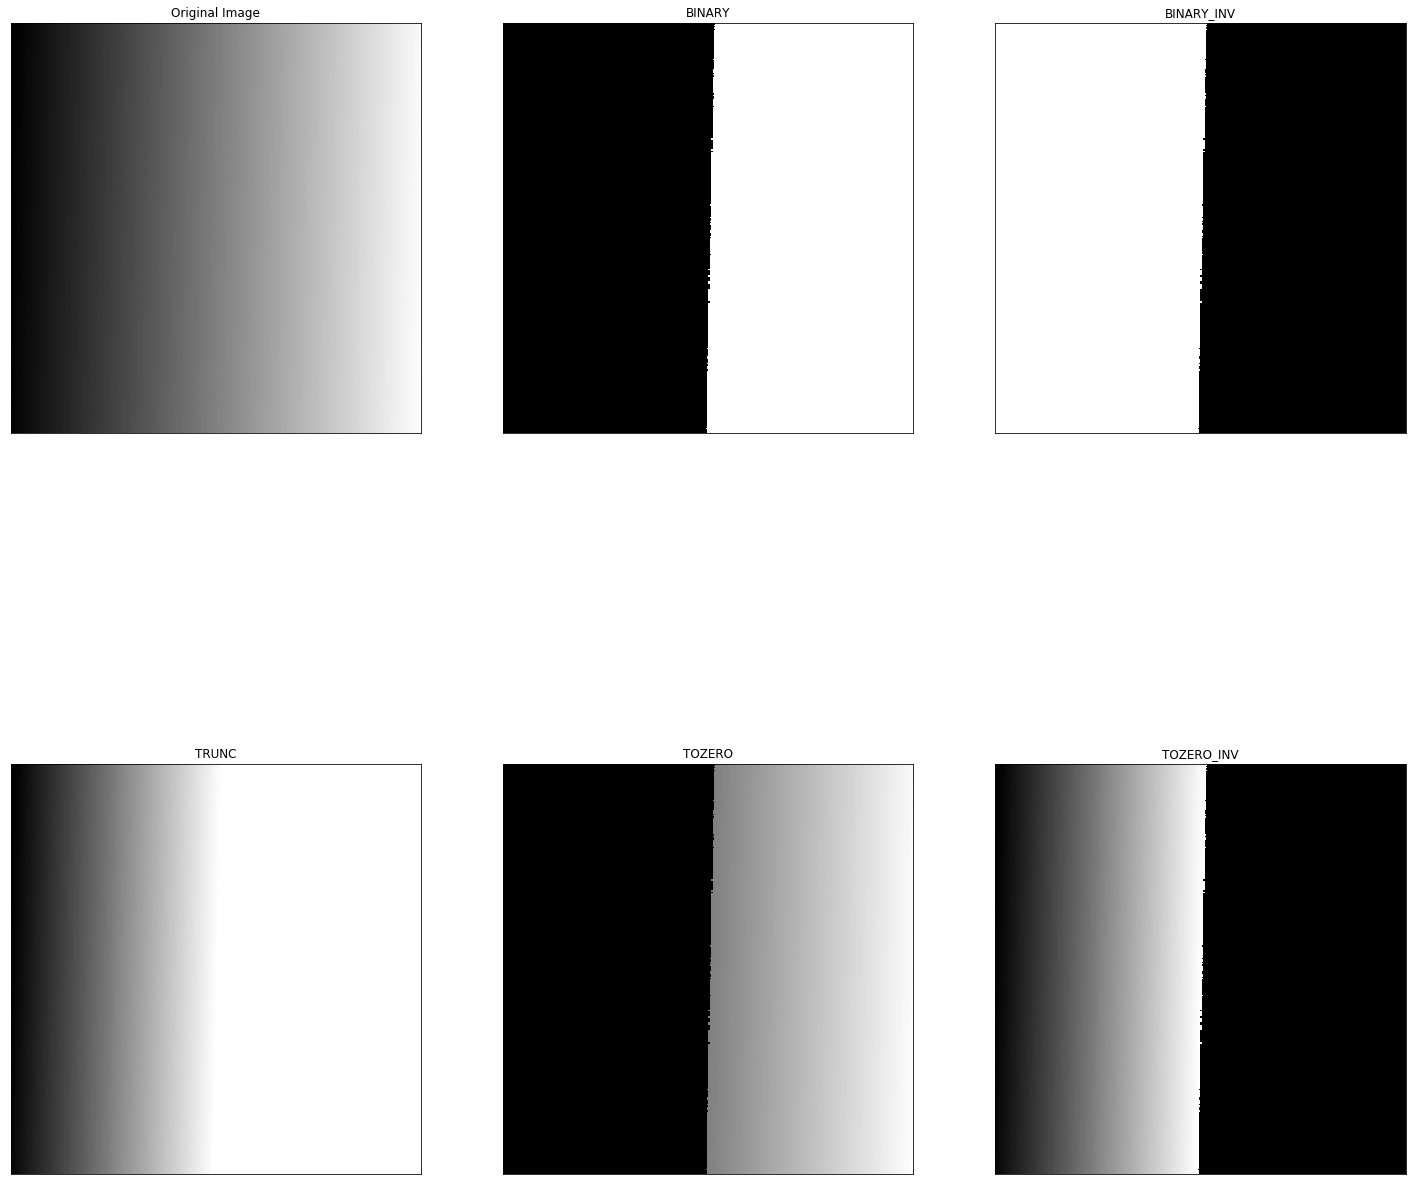

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(25,25))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### `Adaptive Thresholding`

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

#### `Adaptive Method` - It decides how thresholding value is calculated.

* cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
* cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
Block Size - It decides the size of neighbourhood area.

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

Below piece of code compares global thresholding and adaptive thresholding for an image with varying illumination:

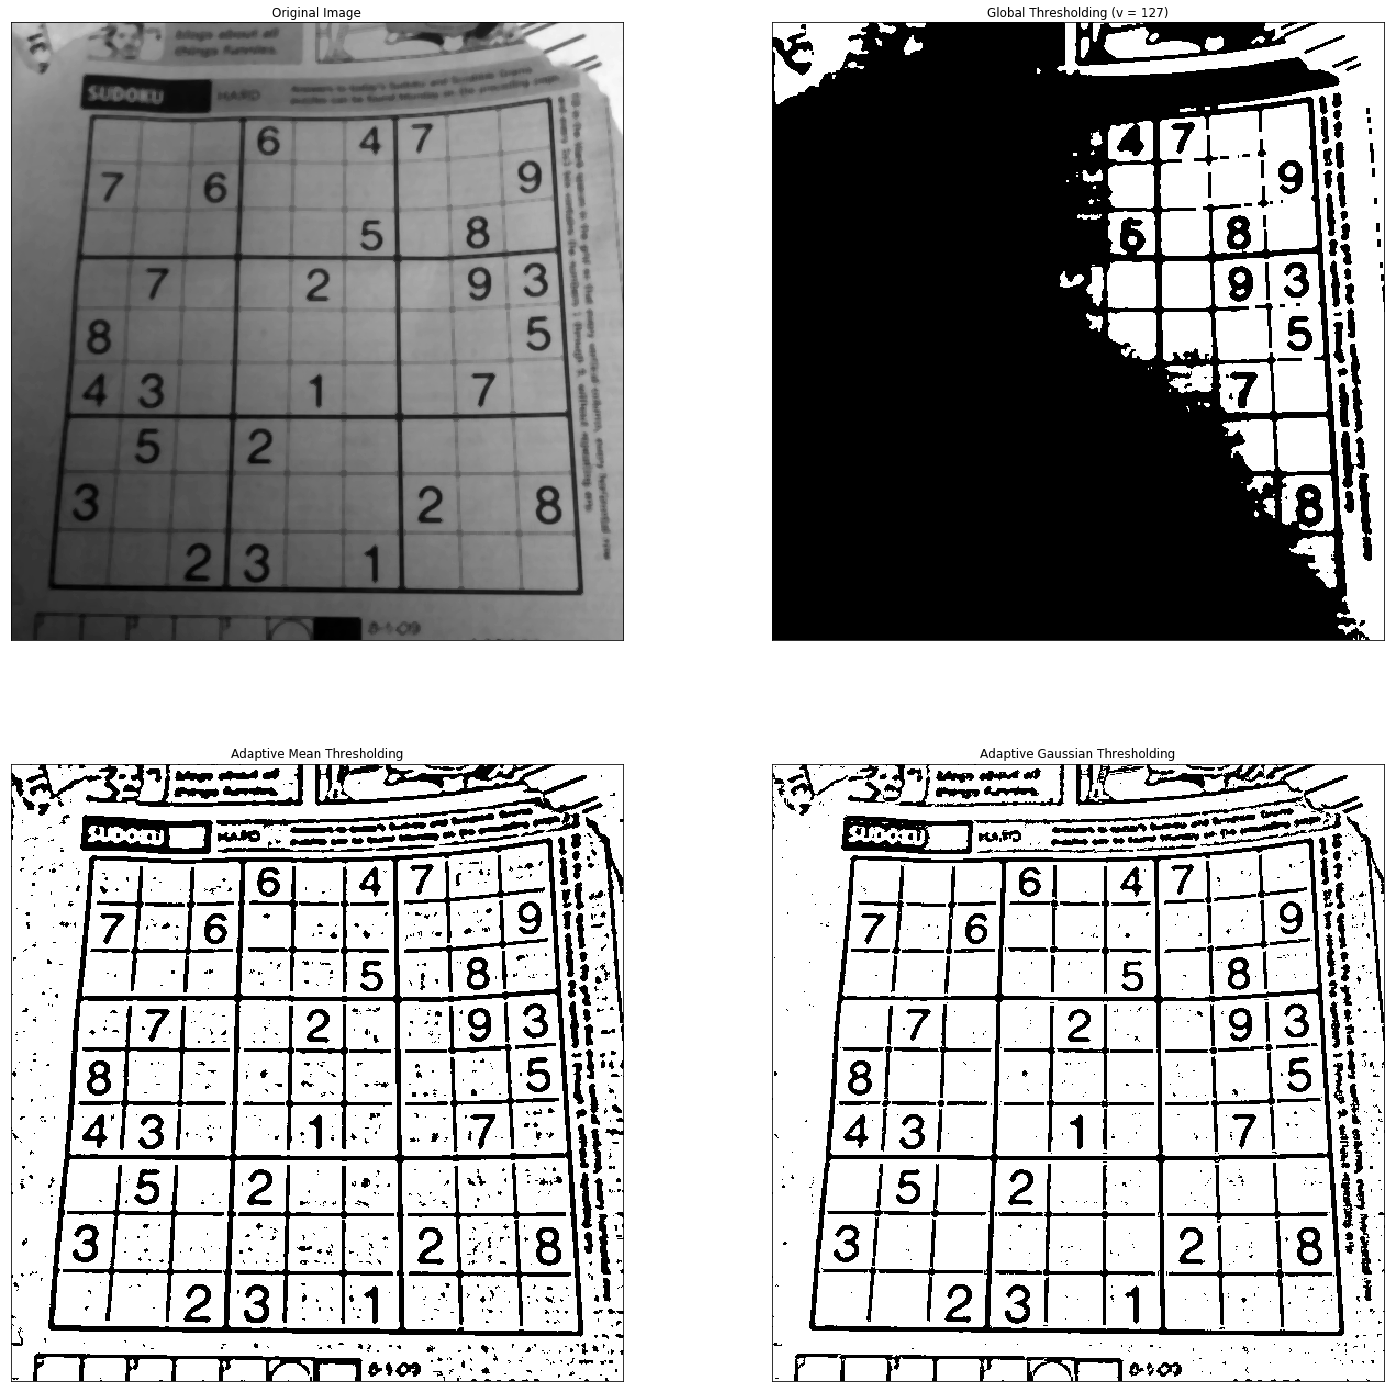

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sudoku.png',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(25,25))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### `Otsu’s Binarization`

In the first section, I told you there is a second parameter retVal. Its use comes when we go for Otsu’s Binarization. So what is it?

In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected is good or not? Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)

For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

Check out below example. Input image is a noisy image. In first case, I applied global thresholding for a value of 127. In second case, I applied Otsu’s thresholding directly. In third case, I filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.



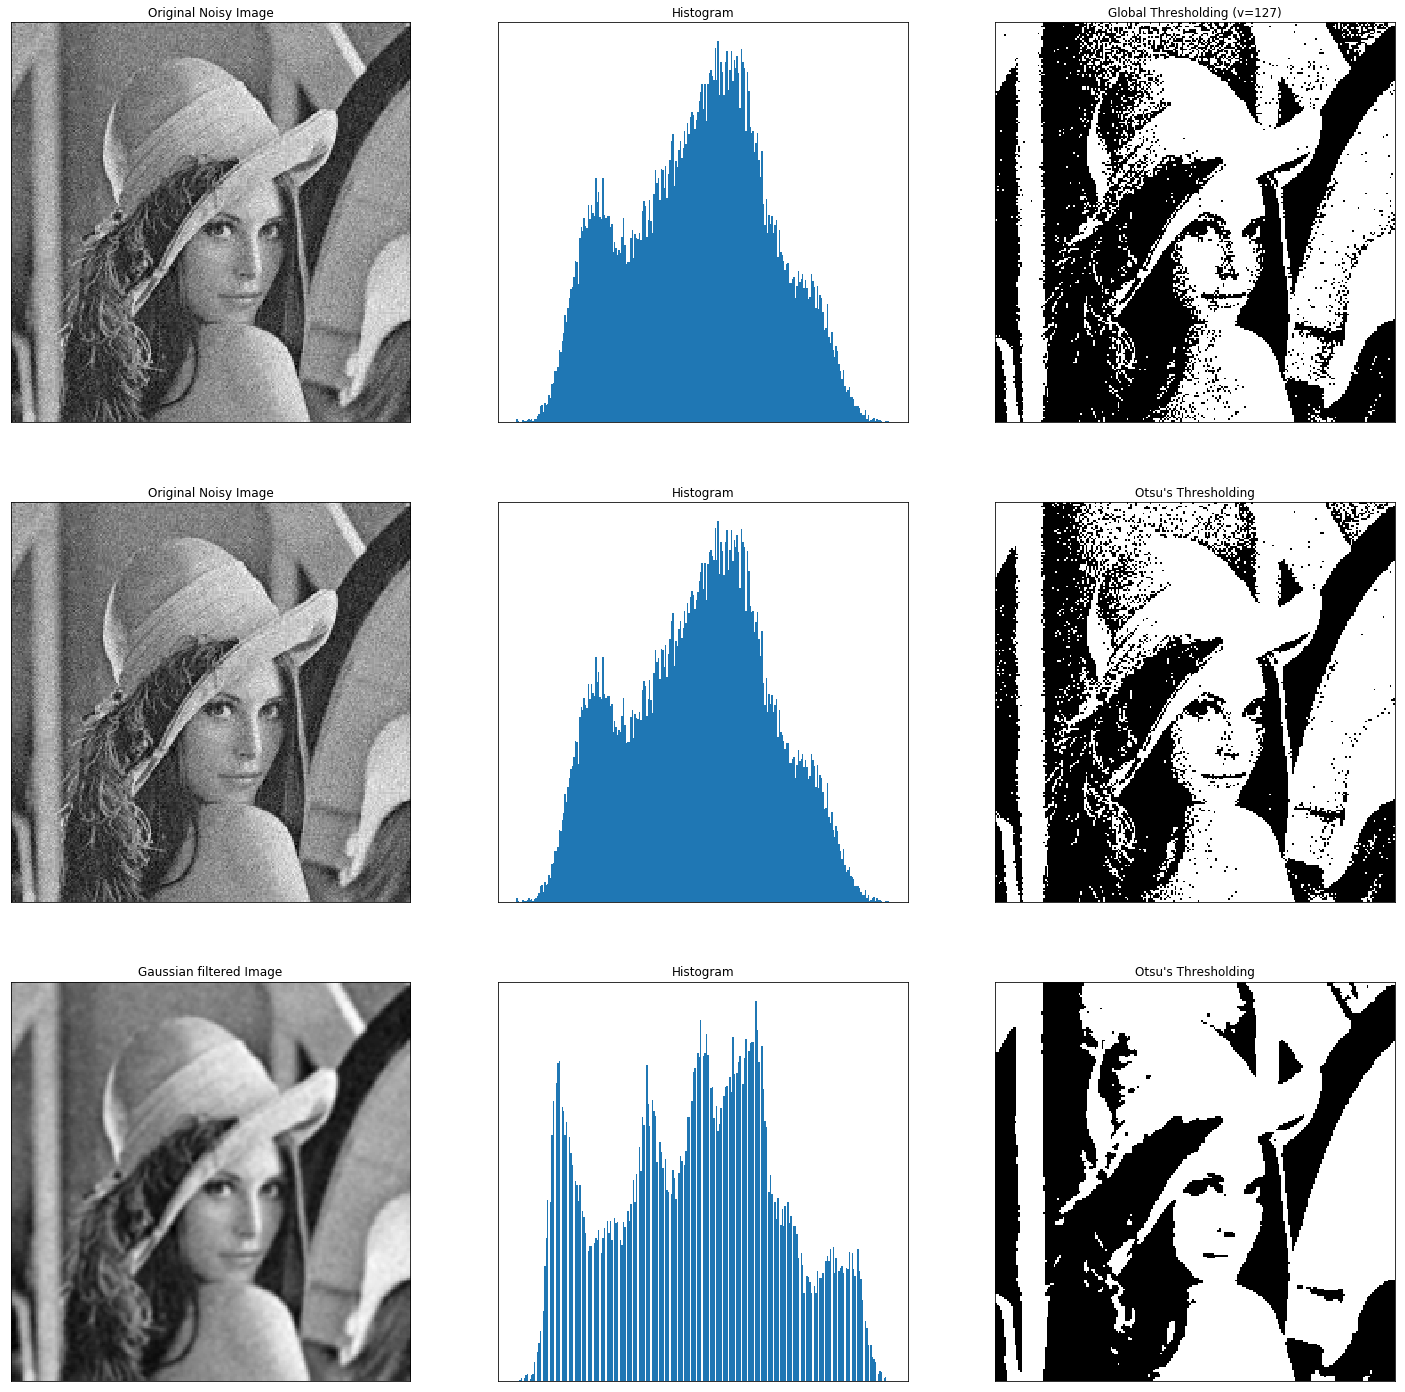

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('noisy2.png',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(25,25))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Smoothing Images

### `Goals`

Learn to:

* Blur the images with various low pass filters
* Apply custom-made filters to images (2D convolution)

### `2D Convolution ( Image Filtering )`

As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. LPF helps in removing noises, blurring the images etc. HPF filters helps in finding edges in the images.

OpenCV provides a function cv2.filter2D() to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:

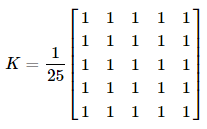

Operation is like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take its average and replace the central pixel with the new average value. It continues this operation for all the pixels in the image. Try this code and check the result:

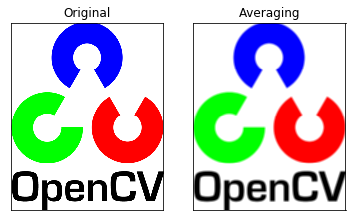

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('opencv-logo.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### `Image Blurring (Image Smoothing)`

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which doesn't blur the edges too). OpenCV provides mainly four types of blurring techniques.

#### `Averaging`

This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element. This is done by the function cv2.blur() or cv2.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like below:

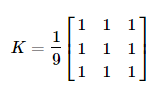

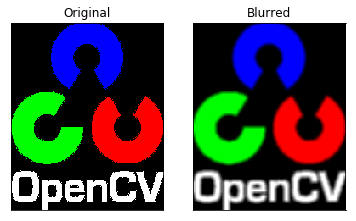

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('opencv-logo-white.png')
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### `Gaussian Blurring`

In this, instead of box filter, gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel().

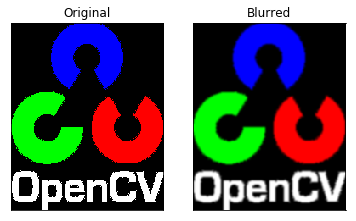

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('opencv-logo-white.png')
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### `Median Blurring`

Here, the function cv2.medianBlur() takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.


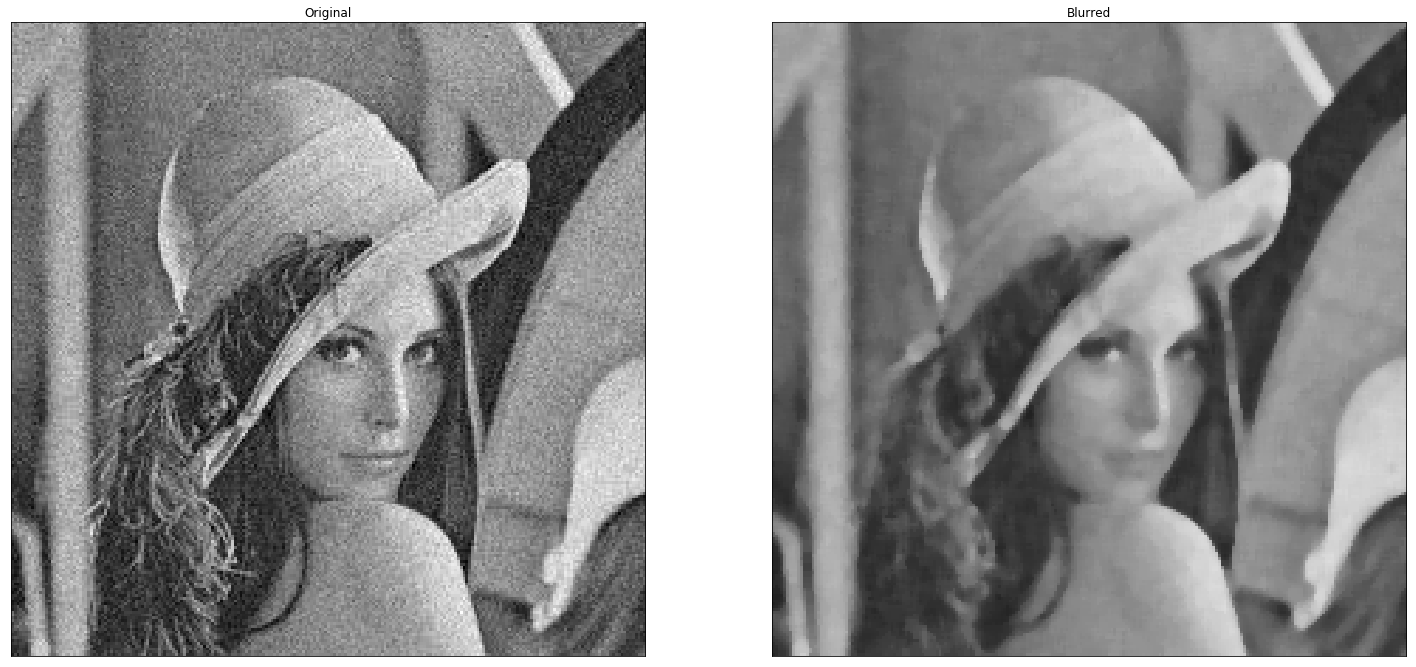

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('noisy2.png')
median = cv2.medianBlur(img,5)
plt.figure(figsize=(25,25))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

#### `Bilateral Filtering`

cv2.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost same intensity. It doesn't consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

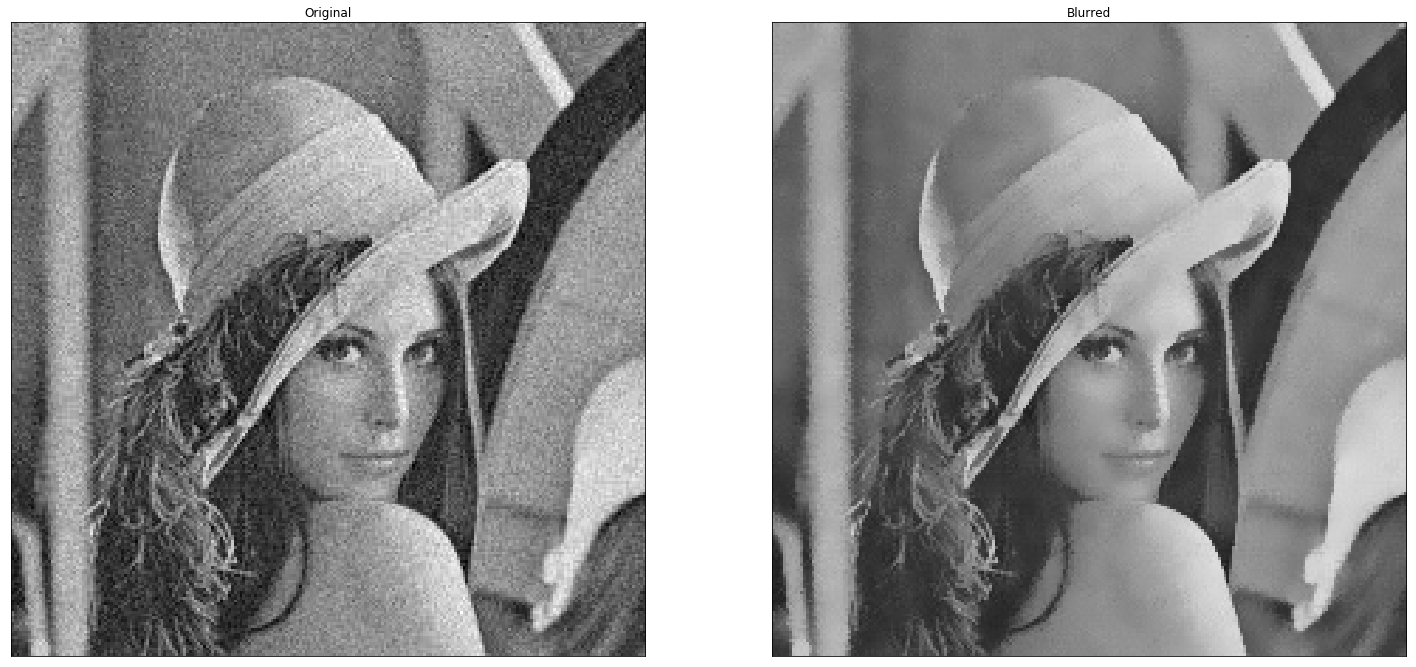

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('noisy2.png')
blur = cv2.bilateralFilter(img,9,75,75)
plt.figure(figsize=(25,25))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## `Morphological Transformations`

### `Goal`

In this chapter,

* We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.
* We will see different functions like : cv2.erode(), cv2.dilate(), cv2.morphologyEx() etc.

### `Theory`

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

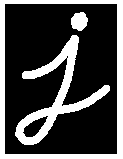

### `Erosion`

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:

In [46]:
import cv2
import numpy as np
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
cv2.imshow('img',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

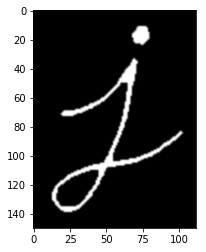

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

### `Dilation`

It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

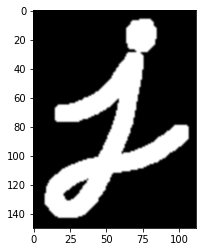

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

### `Opening`

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

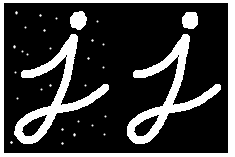

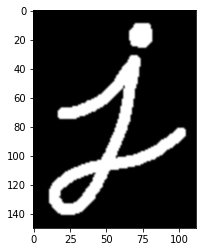

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

### `Closing`

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

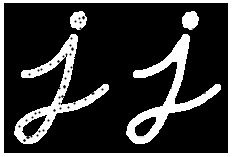

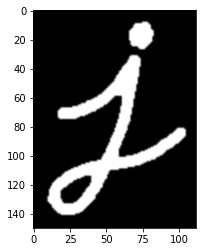

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

### `Morphological Gradient`

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

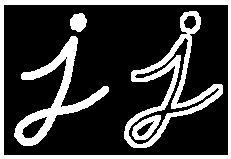

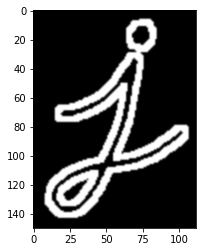

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

### `Top Hat`

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel

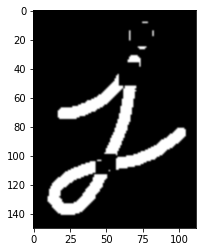

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('j.png',0)
kernel = np.ones((9,9),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

### `Black Hat`

It is the difference between the closing of the input image and input image.

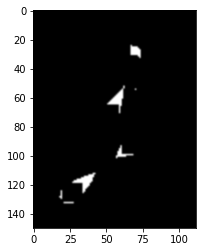

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('j.png',0)
kernel = np.ones((9,9),np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

## `Image Gradients`

### `Goal`

In this chapter, we will learn to:

* Find Image gradients, edges etc
* We will see following functions : cv2.Sobel(), cv2.Scharr(), cv2.Laplacian() etc

### `Theory`

OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. We will see each one of them.

#### `Sobel and Scharr Derivatives`

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.

#### `Laplacian Derivatives`

It calculates the Laplacian of the image given by the relation, 

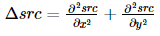

where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

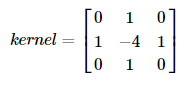

Below code shows all operators in a single diagram. All kernels are of 5x5 size. Depth of output image is passed -1 to get the result in np.uint8 type.

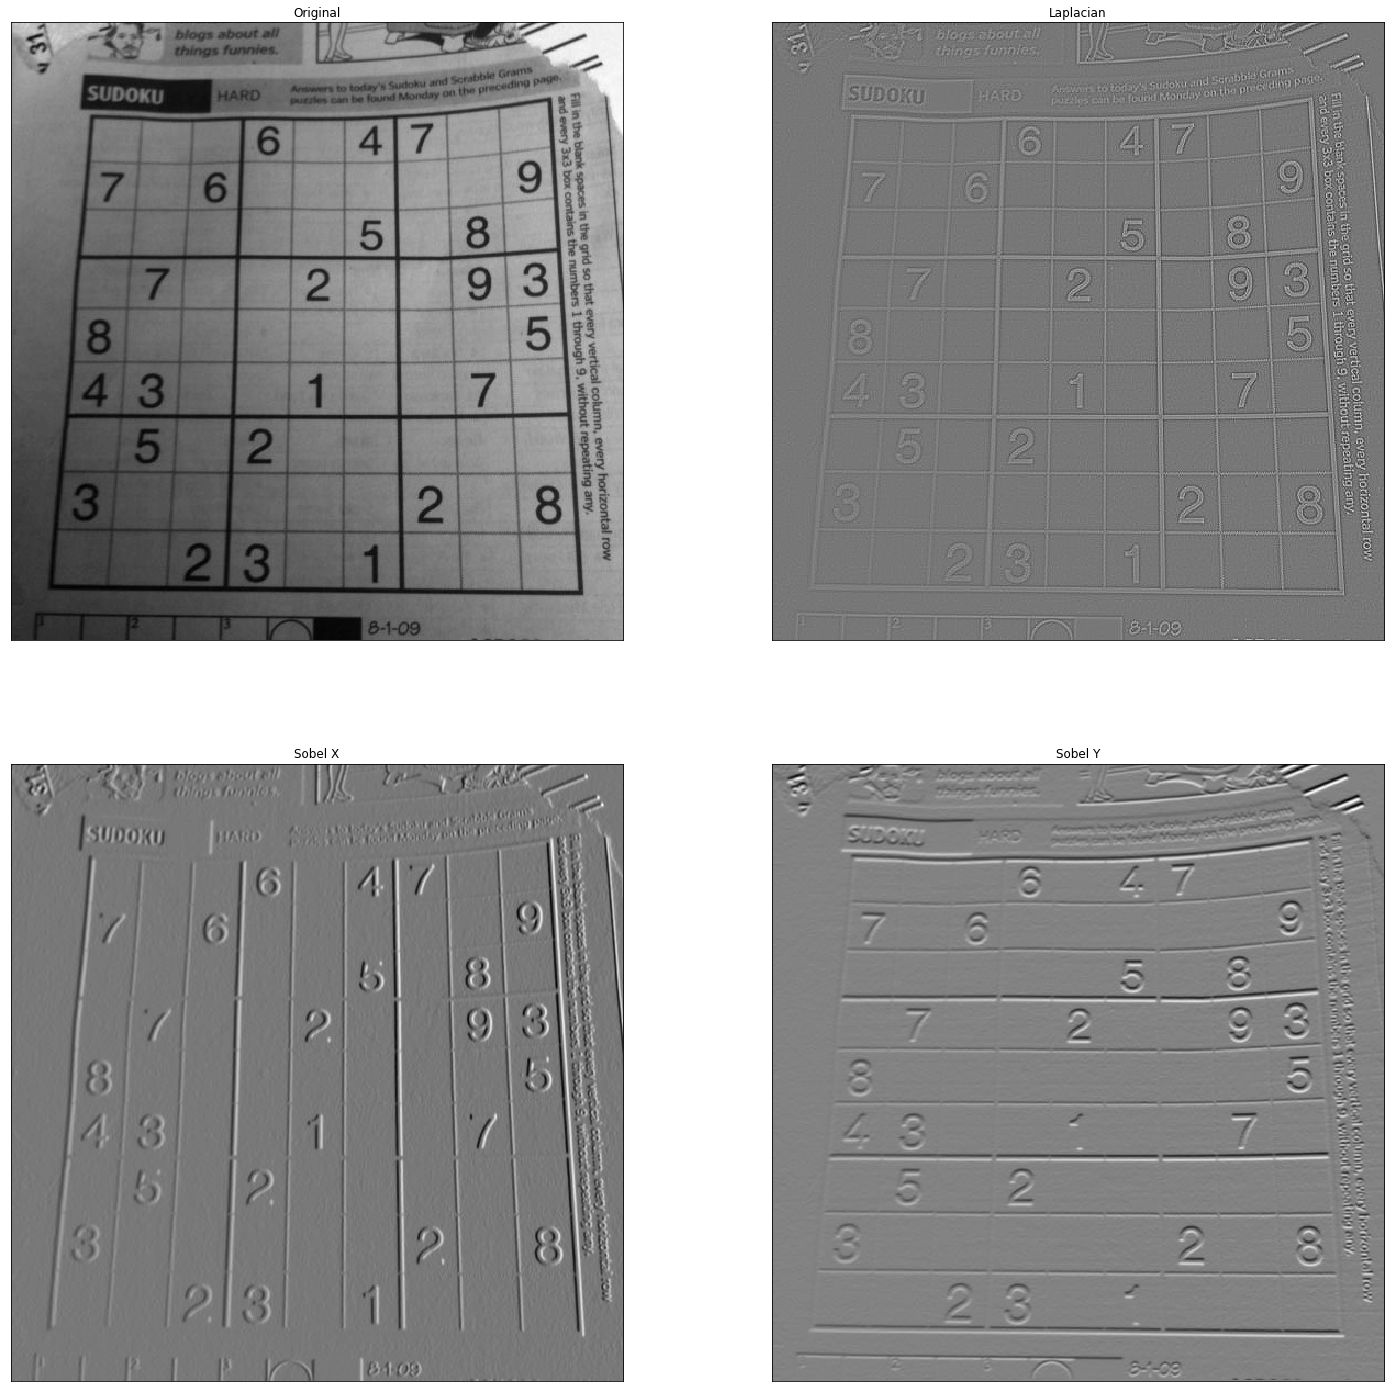

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sudoku.png',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
plt.figure(figsize=(25,25))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

## `Canny Edge Detection`

### `Goal`

In this chapter, we will learn about

* Concept of Canny edge detection
* OpenCV functions for that : cv2.Canny()

### `Theory`

Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in

* It is a multi-stage algorithm and we will go through each stages.
* Noise Reduction

Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. We have already seen this in previous chapters.

* Finding Intensity Gradient of the Image

Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ( Gx) and vertical direction ( Gy). From these two images, we can find edge gradient and direction for each pixel as follows:

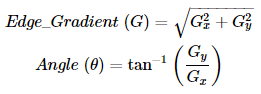

Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

* Non-maximum Suppression

After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Check the image below:

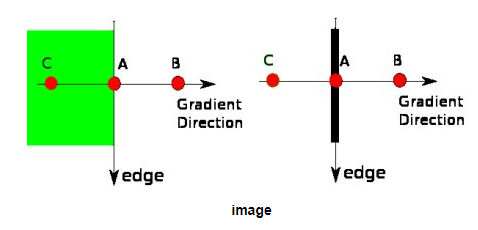

Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

In short, the result you get is a binary image with "thin edges".

* Hysteresis Thresholding

This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

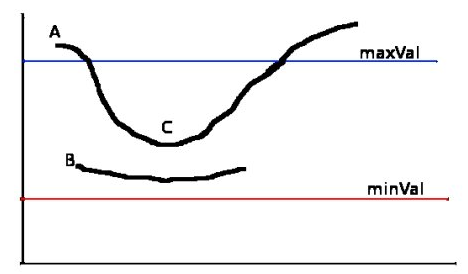

The edge A is above the maxVal, so considered as "sure-edge". Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

This stage also removes small pixels noises on the assumption that edges are long lines.

So what we finally get is strong edges in the image.

### `Canny Edge Detection in OpenCV`

OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G)=|Gx|+|Gy|. By default, it is False.

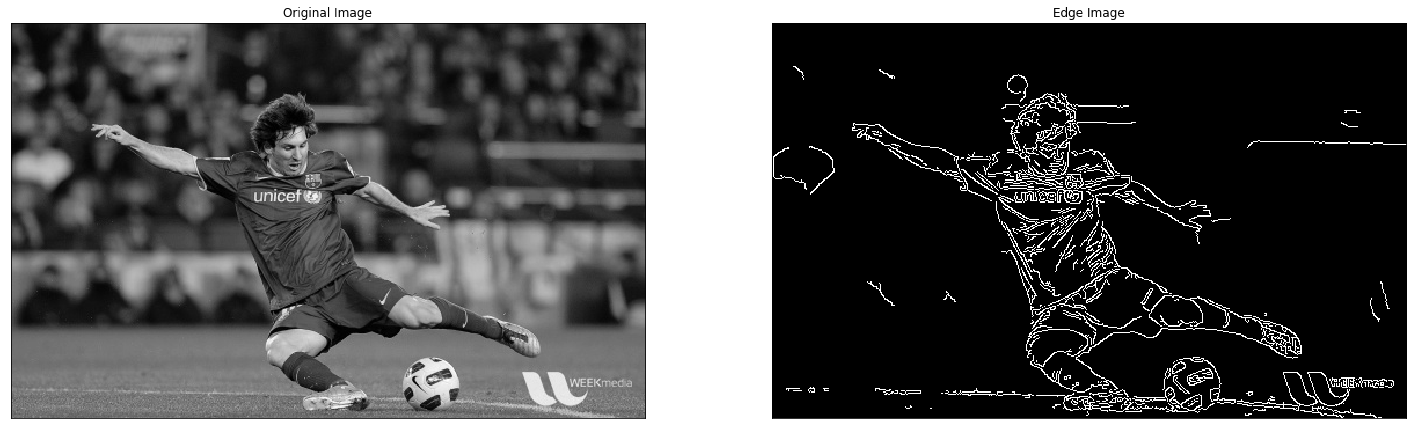

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)
plt.figure(figsize=(25,25))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Image Pyramids

### `Goal`

In this chapter,

* We will learn about Image Pyramids
* We will use Image pyramids to create a new fruit, "Orapple"
* We will see these functions: cv2.pyrUp(), cv2.pyrDown()

### `Theory`

Normally, we used to work with an image of constant size. But in some occassions, we need to work with images of different resolution of the same image. For example, while searching for something in an image, like face, we are not sure at what size the object will be present in the image. In that case, we will need to create a set of images with different resolution and search for object in all the images. These set of images with different resolution are called Image Pyramids (because when they are kept in a stack with biggest image at bottom and smallest image at top look like a pyramid).

There are two kinds of Image Pyramids. 1) Gaussian Pyramid and 2) Laplacian Pyramids

Higher level (Low resolution) in a Gaussian Pyramid is formed by removing consecutive rows and columns in Lower level (higher resolution) image. Then each pixel in higher level is formed by the contribution from 5 pixels in underlying level with gaussian weights. By doing so, a M×N image becomes M/2×N/2 image. So area reduces to one-fourth of original area. It is called an Octave. The same pattern continues as we go upper in pyramid (ie, resolution decreases). Similarly while expanding, area becomes 4 times in each level. We can find Gaussian pyramids using cv2.pyrDown() and cv2.pyrUp() functions.

Below is the 4 levels in an image pyramid.

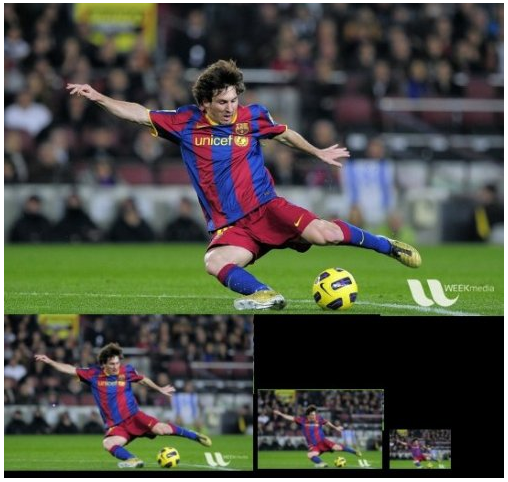

Now you can go down the image pyramid with cv2.pyrUp() function.

Remember, higher_reso2 is not equal to higher_reso, because once you decrease the resolution, you loose the information. Below image is 3 level down the pyramid created from smallest image in previous case. Compare it with original image:

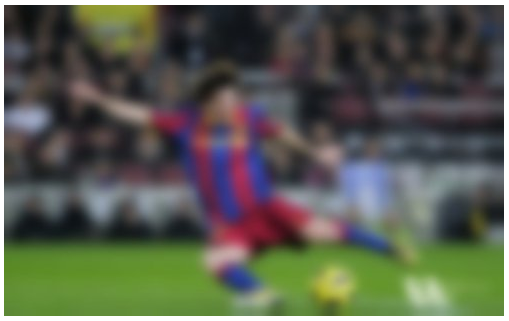

Laplacian Pyramids are formed from the Gaussian Pyramids. There is no exclusive function for that. Laplacian pyramid images are like edge images only. Most of its elements are zeros. They are used in image compression. A level in Laplacian Pyramid is formed by the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid. The three levels of a Laplacian level will look like below (contrast is adjusted to enhance the contents):



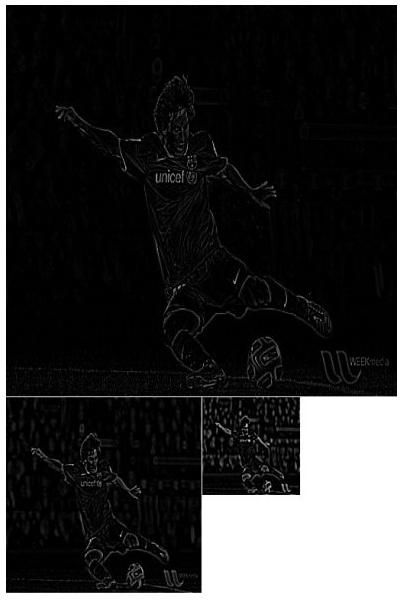

### `Image Blending using Pyramids`

One application of Pyramids is Image Blending. For example, in image stitching, you will need to stack two images together, but it may not look good due to discontinuities between images. In that case, image blending with Pyramids gives you seamless blending without leaving much data in the images. One classical example of this is the blending of two fruits, Orange and Apple. See the result now itself to understand what I am saying:

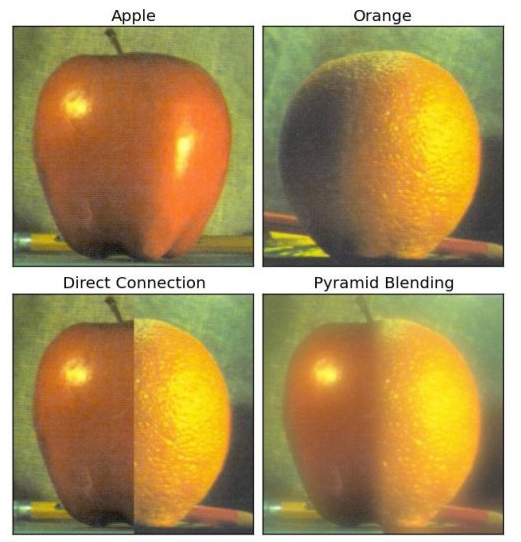

Please check first reference in additional resources, it has full diagramatic details on image blending, Laplacian Pyramids etc. Simply it is done as follows:

* Load the two images of apple and orange
* Find the Gaussian Pyramids for apple and orange (in this particular example, number of levels is 6)
* From Gaussian Pyramids, find their Laplacian Pyramids
* Now join the left half of apple and right half of orange in each levels of Laplacian Pyramids
* Finally from this joint image pyramids, reconstruct the original image.

Below is the full code. (For sake of simplicity, each step is done separately which may take more memory. You can optimize it if you want so).

In [68]:
import cv2
import numpy as np,sys
A = cv2.imread('apple.jpg')
B = cv2.imread('orange.jpg')
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
# Now add left and right halves of images in each level
# In 3.x, int/int gives a float. which is not an int. So use // instead of / in the below code

LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:(cols//2)], lb[:,(cols//2):]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])
# image with direct connecting each half
real = np.hstack((A[:,:(cols//2)],B[:,(cols//2):]))
cv2.imwrite('Pyramid_blending2.jpg',ls_)
cv2.imwrite('Direct_blending.jpg',real)

True

## `Contours in OpenCV`

### `Getting Started`

#### `Goal`

* Understand what contours are.
* Learn to find contours, draw contours etc
* You will see these functions : cv2.findContours(), cv2.drawContours()

#### `What are contours?`

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
Since OpenCV 3.2, findContours() no longer modifies the source image but returns a modified image as the first of three return parameters.
In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.
Let's see how to find contours of a binary image:

In [4]:
import numpy as np
import cv2
im = cv2.imread('test.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im, contours, -1, (0,255,0), 3)
cv2.imshow('image',im) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

## Histograms in OpenCV

### `Find, Plot, Analyze !!!`

#### `Goal`

Learn to

* Find histograms, using both OpenCV and Numpy functions
* Plot histograms, using OpenCV and Matplotlib functions
* You will see these functions : cv2.calcHist(), np.histogram() etc.

#### `Theory`

So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram. Below is an image from Cambridge in Color website, and I recommend you to visit the site for more details.

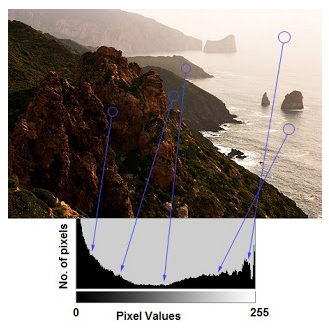

You can see the image and its histogram. (Remember, this histogram is drawn for grayscale image, not color image). Left region of histogram shows the amount of darker pixels in image and right region shows the amount of brighter pixels. From the histogram, you can see dark region is more than brighter region, and amount of midtones (pixel values in mid-range, say around 127) are very less.

#### `Find Histogram`

Now we have an idea on what is histogram, we can look into how to find this. Both OpenCV and Numpy come with in-built function for this. Before using those functions, we need to understand some terminologies related with histograms.

`BINS` :The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram. But consider, what if you need not find the number of pixels for all pixel values separately, but number of pixels in a interval of pixel values? say for example, you need to find the number of pixels lying between 0 to 15, then 16 to 31, ..., 240 to 255. You will need only 16 values to represent the histogram. And that is what is shown in example given in OpenCV Tutorials on histograms.

So what you do is simply split the whole histogram to 16 sub-parts and value of each sub-part is the sum of all pixel count in it. This each sub-part is called "BIN". In first case, number of bins were 256 (one for each pixel) while in second case, it is only 16. BINS is represented by the term histSize in OpenCV docs.

`DIMS` : It is the number of parameters for which we collect the data. In this case, we collect data regarding only one thing, intensity value. So here it is 1.

`RANGE` : It is the range of intensity values you want to measure. Normally, it is [0,256], ie all intensity values.

##### `1. Histogram Calculation in OpenCV`

So now we use cv2.calcHist() function to find the histogram. Let's familiarize with the function and its parameters :

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

* mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

So let's start with a sample image. Simply load an image in grayscale mode and find its full histogram.

`img = cv2.imread('home.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])`

hist is a 256x1 array, each value corresponds to number of pixels in that image with its corresponding pixel value.

##### `2. Histogram Calculation in Numpy`

Numpy also provides you a function, np.histogram(). So instead of calcHist() function, you can try below line :

`hist,bins = np.histogram(img.ravel(),256,[0,256])`

hist is same as we calculated before. But bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99 etc. So final range would be 255-255.99. To represent that, they also add 256 at end of bins. But we don't need that 256. Upto 255 is sufficient.

See also

Numpy has another function, np.bincount() which is much faster than (around 10X) np.histogram(). So for one-dimensional histograms, you can better try that. Don't forget to set minlength = 256 in np.bincount. For example, `hist = np.bincount(img.ravel(),minlength=256)`

Note

OpenCV function is faster than (around 40X) than np.histogram(). So stick with OpenCV function.
Now we should plot histograms, but how?

Plotting Histograms

There are two ways for this,

Short Way : use Matplotlib plotting functions

Long Way : use OpenCV drawing functions

1. Using Matplotlib

Matplotlib comes with a histogram plotting function : matplotlib.pyplot.hist()

It directly finds the histogram and plot it. You need not use calcHist() or np.histogram() function to find the histogram. See the code below:

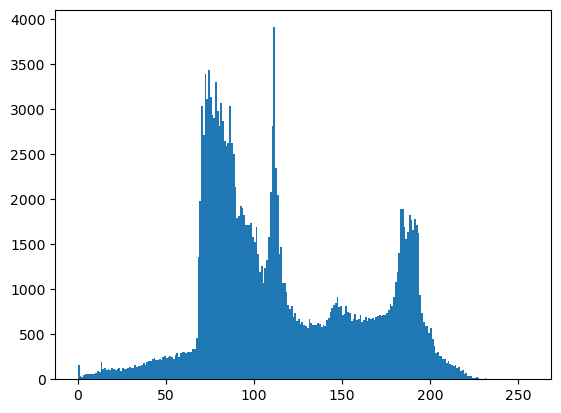

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('home.jpg',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

Or you can use normal plot of matplotlib, which would be good for BGR plot. For that, you need to find the histogram data first. Try below code:

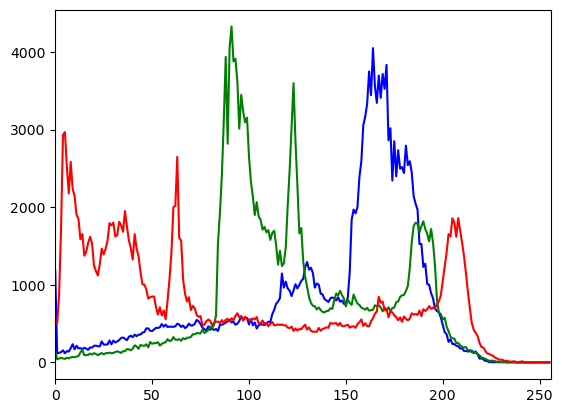

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

You can deduct from the above graph that, blue has some high value areas in the image (obviously it should be due to the sky)

##### `2. Using OpenCV`

Well, here you adjust the values of histograms along with its bin values to look like x,y coordinates so that you can draw it using cv2.line() or cv2.polyline() function to generate same image as above. This is already available with OpenCV-Python2 official samples. Check the code at samples/python/hist.py.

Application of Mask

We used cv2.calcHist() to find the histogram of the full image. What if you want to find histograms of some regions of an image? Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask.

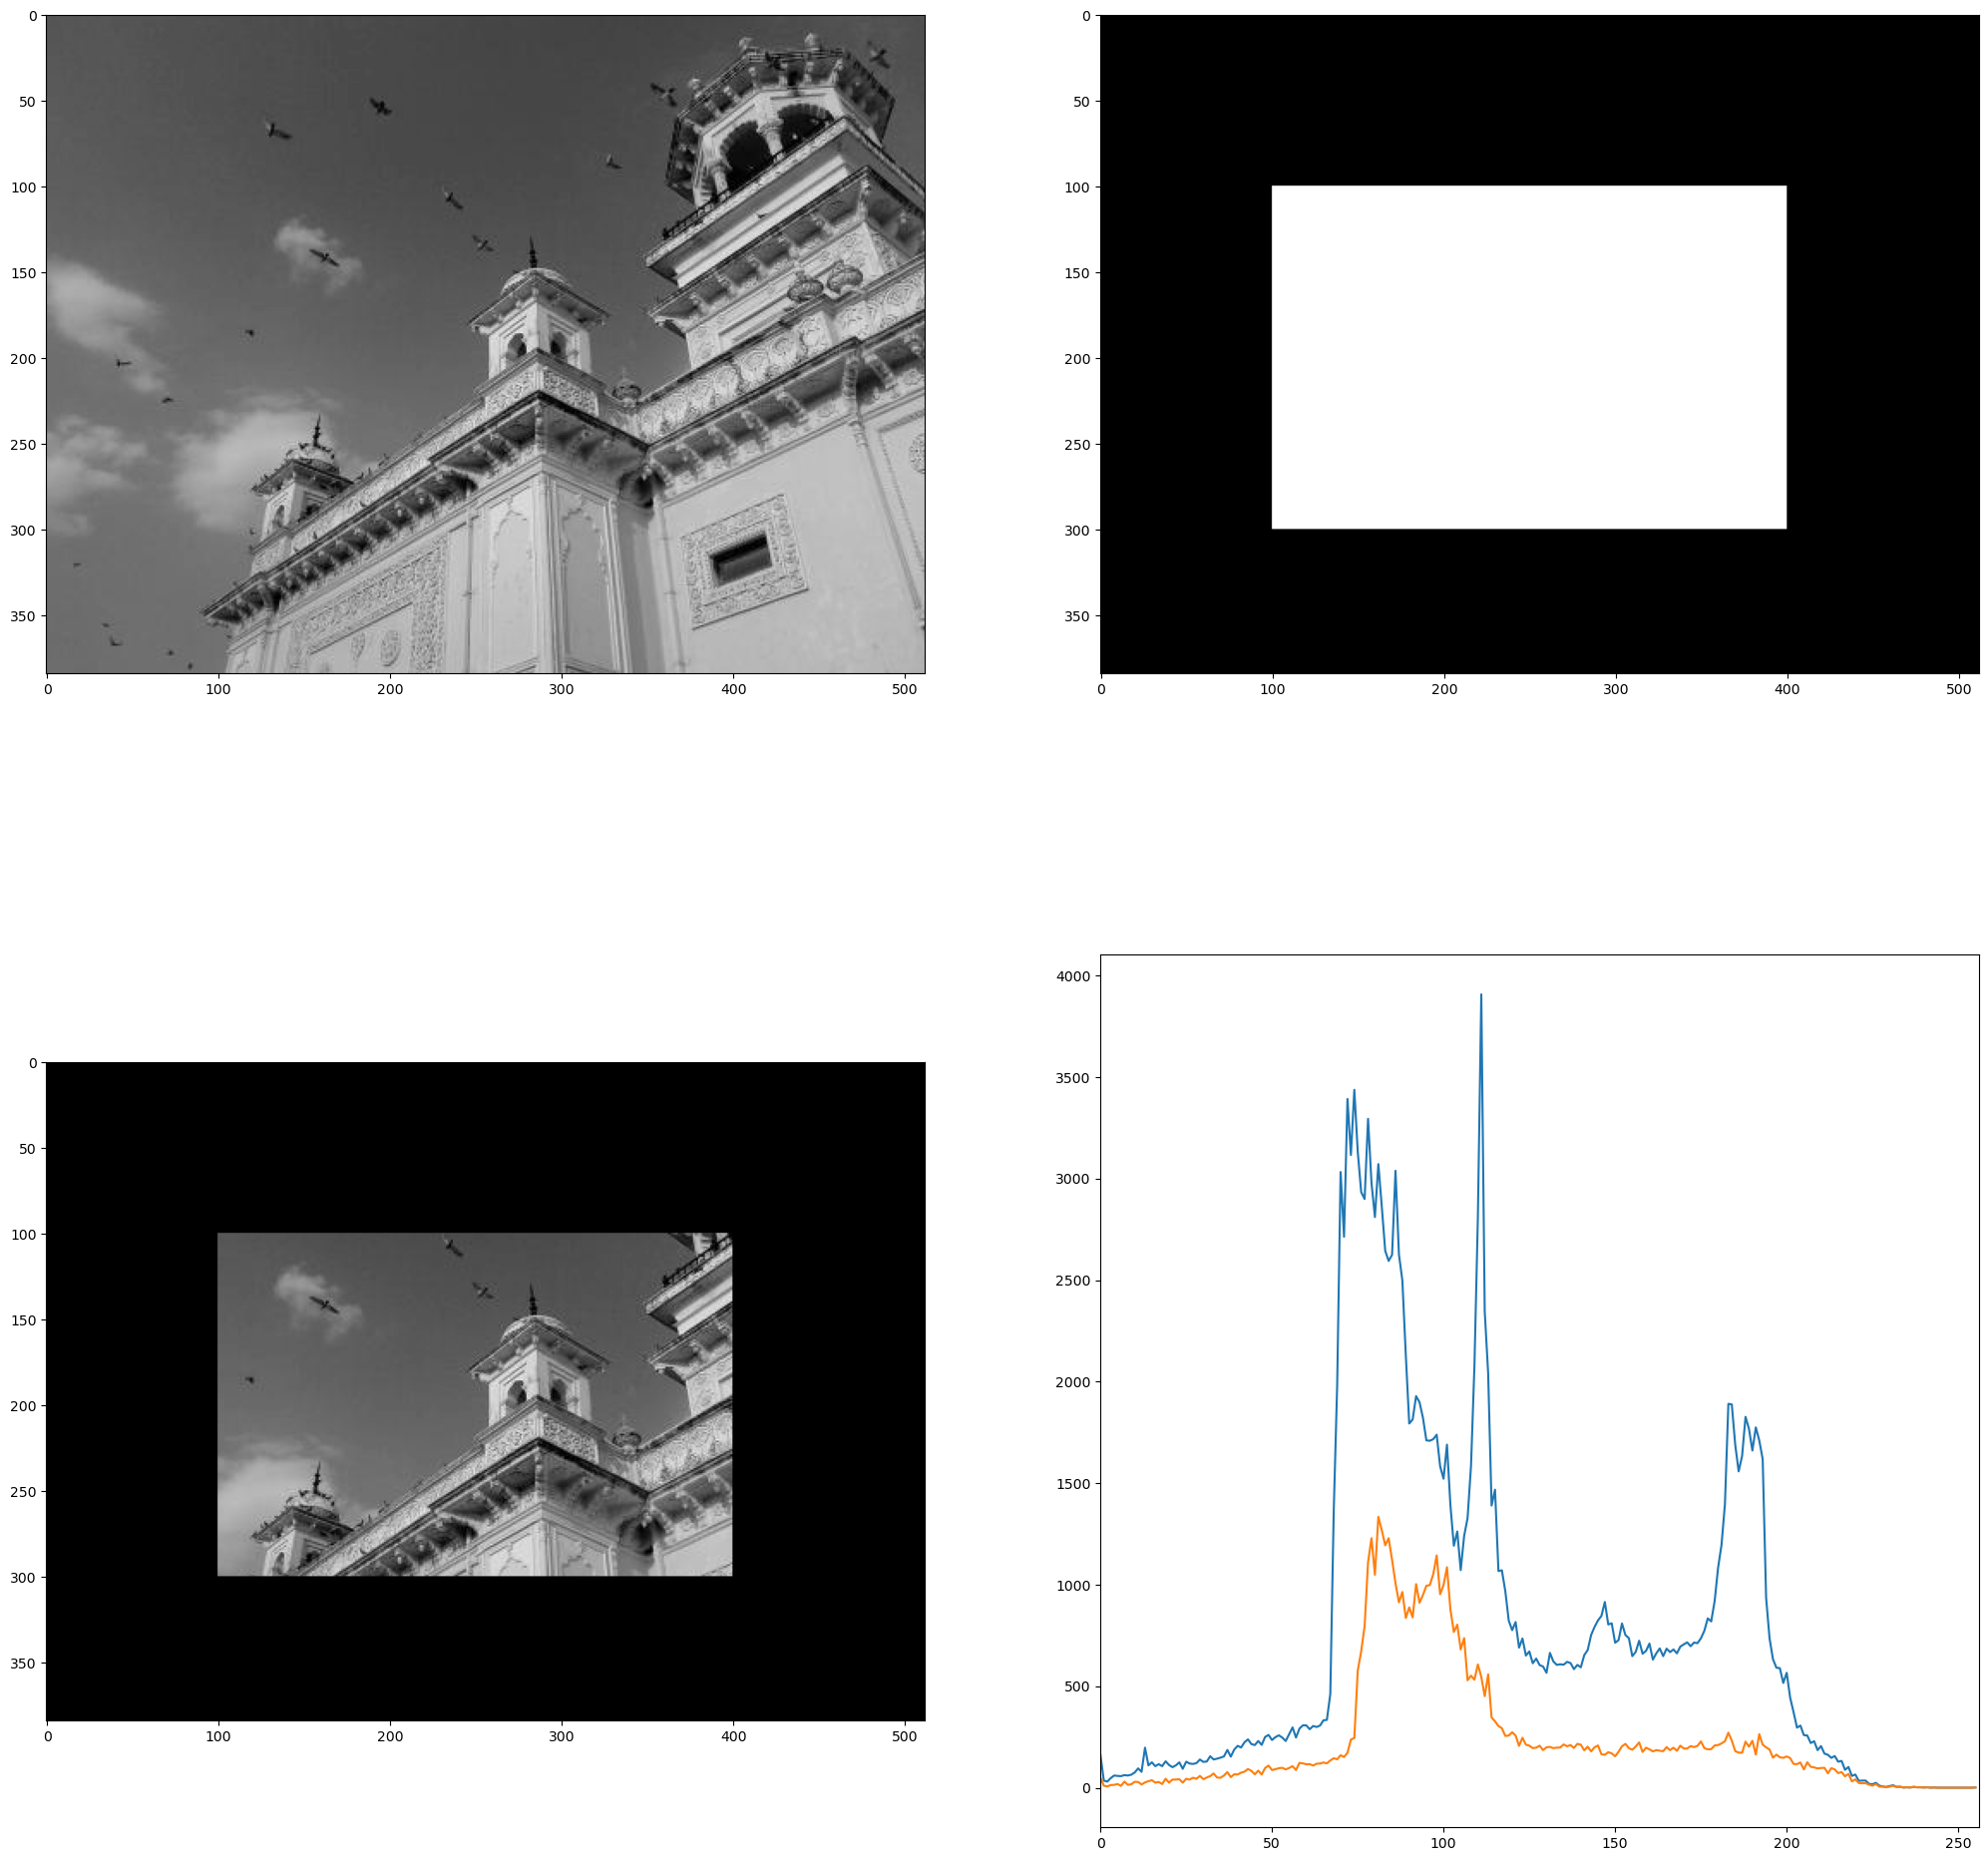

In [7]:
img = cv2.imread('home.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(25,25))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

### `Histogram Equalization`

#### `Goal`

In this section,

* We will learn the concepts of histogram equalization and use it to improve the contrast of our images.
Theory

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

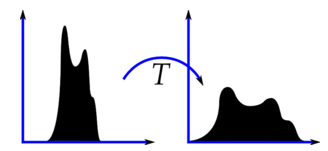

I would recommend you to read the wikipedia page on Histogram Equalization for more details about it. It has a very good explanation with worked out examples, so that you would understand almost everything after reading that. Instead, here we will see its Numpy implementation. After that, we will see OpenCV function.


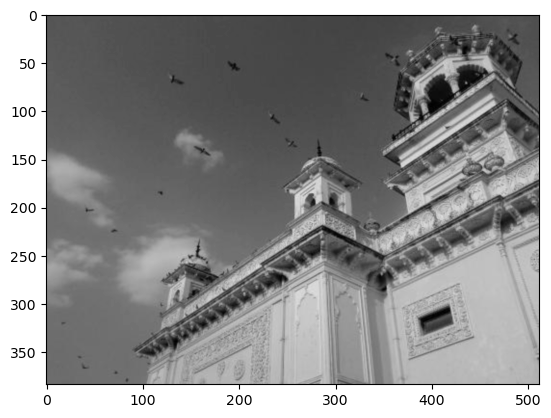

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('home.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

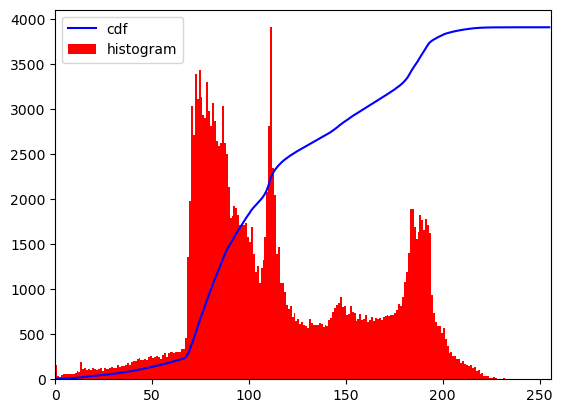

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('home.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

You can see histogram lies in brighter region. We need the full spectrum. For that, we need a transformation function which maps the input pixels in brighter region to output pixels in full region. That is what histogram equalization does.

Now we find the minimum histogram value (excluding 0) and apply the histogram equalization equation as given in wiki page. But I have used here, the masked array concept array from Numpy. For masked array, all operations are performed on non-masked elements. You can read more about it from Numpy docs on masked arrays.

In [10]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

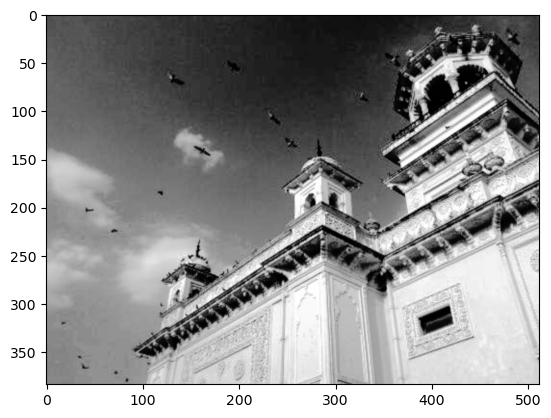

In [11]:
plt.imshow(img2, cmap = 'gray', interpolation = 'bicubic') 
plt.show()

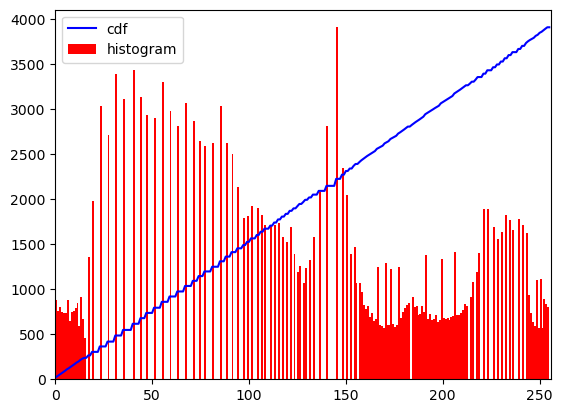

In [12]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Another important feature is that, even if the image was a darker image (instead of a brighter one we used), after equalization we will get almost the same image as we got. As a result, this is used as a "reference tool" to make all images with same lighting conditions. This is useful in many cases. For example, in face recognition, before training the face data, the images of faces are histogram equalized to make them all with same lighting conditions.

##### `Histograms Equalization in OpenCV`

OpenCV has a function to do this, cv2.equalizeHist(). Its input is just grayscale image and output is our histogram equalized image.

Below is a simple code snippet showing its usage for same image we used :

In [13]:
img = cv2.imread('home.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

So now you can take different images with different light conditions, equalize it and check the results.

Histogram equalization is good when histogram of the image is confined to a particular region. It won't work good in places where there is large intensity variations where histogram covers a large region, ie both bright and dark pixels are present. Please check the SOF links in Additional Resources.

#### `CLAHE (Contrast Limited Adaptive Histogram Equalization)`

The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea. For example, below image shows an input image and its result after global histogram equalization.

It is true that the background contrast has improved after histogram equalization. But compare the face of statue in both images. We lost most of the information there due to over-brightness. It is because its histogram is not confined to a particular region as we saw in previous cases (Try to plot histogram of input image, you will get more intuition).

So to solve this problem, adaptive histogram equalization is used. In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

Below code snippet shows how to apply CLAHE in OpenCV:

In [14]:
import numpy as np
import cv2
img = cv2.imread('tsukuba_l.png',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('clahe_2.jpg',cl1)

True

#### `2D Histograms`

##### `Goal`

In this chapter, we will learn to find and plot 2D histograms. It will be helpful in coming chapters.

##### `Introduction`

In the first article, we calculated and plotted one-dimensional histogram. It is called one-dimensional because we are taking only one feature into our consideration, ie grayscale intensity value of the pixel. But in two-dimensional histograms, you consider two features. Normally it is used for finding color histograms where two features are Hue & Saturation values of every pixel.

There is a python sample (samples/python/color_histogram.py) already for finding color histograms. We will try to understand how to create such a color histogram, and it will be useful in understanding further topics like Histogram Back-Projection.

##### `2D Histogram in OpenCV`

It is quite simple and calculated using the same function, cv2.calcHist(). For color histograms, we need to convert the image from BGR to HSV. (Remember, for 1D histogram, we converted from BGR to Grayscale). For 2D histograms, its parameters will be modified as follows:

channels = [0,1] because we need to process both H and S plane.

bins = [180,256] 180 for H plane and 256 for S plane.

range = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256.

Now check the code below:

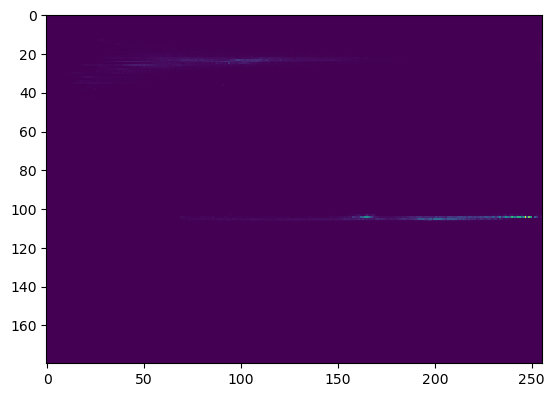

In [15]:
import cv2
import numpy as np
img = cv2.imread('home.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(hist,interpolation = 'nearest')
plt.show()

Above is the input image and its color histogram plot. X axis shows S values and Y axis shows Hue.

### `Histogram Backprojection`

It was proposed by Michael J. Swain , Dana H. Ballard in their paper Indexing via color histograms.

What is it actually in simple words? It is used for image segmentation or finding objects of interest in an image. In simple words, it creates an image of the same size (but single channel) as that of our input image, where each pixel corresponds to the probability of that pixel belonging to our object. In more simpler worlds, the output image will have our object of interest in more white compared to remaining part. Well, that is an intuitive explanation. (I can't make it more simpler). Histogram Backprojection is used with camshift algorithm etc.

How do we do it ? We create a histogram of an image containing our object of interest (in our case, the ground, leaving player and other things). The object should fill the image as far as possible for better results. And a color histogram is preferred over grayscale histogram, because color of the object is a better way to define the object than its grayscale intensity. We then "back-project" this histogram over our test image where we need to find the object, ie in other words, we calculate the probability of every pixel belonging to the ground and show it. The resulting output on proper thresholding gives us the ground alone

OpenCV provides an inbuilt function cv2.calcBackProject(). Its parameters are almost same as the cv2.calcHist() function. One of its parameter is histogram which is histogram of the object and we have to find it. Also, the object histogram should be normalized before passing on to the backproject function. It returns the probability image. Then we convolve the image with a disc kernel and apply threshold. Below is my code and output :

In [16]:
import cv2
import numpy as np
roi = cv2.imread('messi5.jpg')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
target = cv2.imread('messi51.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)
# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))
cv2.imwrite('res1.jpg',res)

True

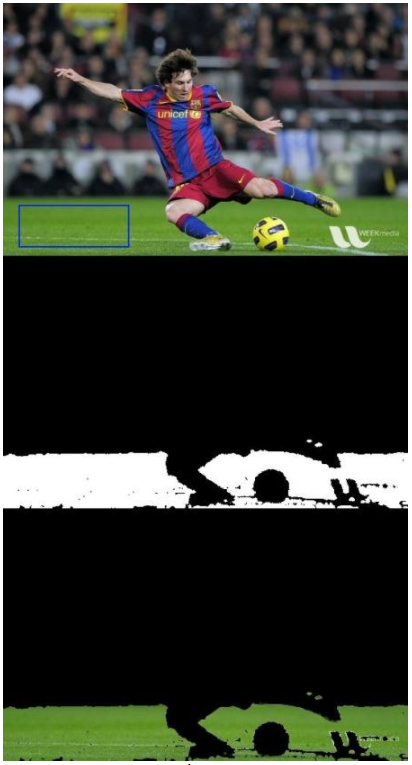

### Fourier Transform

#### `Goal`

In this section, we will learn

* To find the Fourier Transform of images using OpenCV
* To utilize the FFT functions available in Numpy
* Some applications of Fourier Transform
We will see following functions : cv2.dft(), cv2.idft() etc

#### `Theory`

Fourier Transform is used to analyze the frequency characteristics of various filters. For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT. Details about these can be found in any image processing or signal processing textbooks. Please see Additional Resources_ section.

For a sinusoidal signal, x(t)=Asin(2πft), we can say f is the frequency of signal, and if its frequency domain is taken, we can see a spike at f. If signal is sampled to form a discrete signal, we get the same frequency domain, but is periodic in the range [−π,π] or [0,2π] (or [0,N] for N-point DFT). You can consider an image as a signal which is sampled in two directions. So taking fourier transform in both X and Y directions gives you the frequency representation of image.

More intuitively, for the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. You can extend the same idea to images. Where does the amplitude varies drastically in images ? At the edge points, or noises. So we can say, edges and noises are high frequency contents in an image. If there is no much changes in amplitude, it is a low frequency component. ( Some links are added to Additional Resources_ which explains frequency transform intuitively with examples).

Now we will see how to find the Fourier Transform.

#### `Fourier Transform in Numpy`

First we will see how to find Fourier Transform using Numpy. Numpy has an FFT package to do this. np.fft.fft2() provides us the frequency transform which will be a complex array. Its first argument is the input image, which is grayscale. Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, Output array size will be same as input.

Now once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by N2 in both the directions. This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.

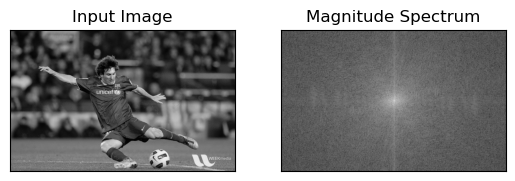

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

See, You can see more whiter region at the center showing low frequency content is more.

So you found the frequency transform Now you can do some operations in frequency domain, like high pass filtering and reconstruct the image, ie find inverse DFT. For that you simply remove the low frequencies by masking with a rectangular window of size 60x60. Then apply the inverse shift using np.fft.ifftshift() so that DC component again come at the top-left corner. Then find inverse FFT using np.ifft2() function. The result, again, will be a complex number. You can take its absolute value.

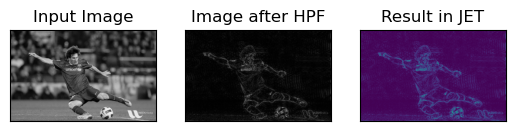

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

The result shows High Pass Filtering is an edge detection operation. This is what we have seen in Image Gradients chapter. This also shows that most of the image data is present in the Low frequency region of the spectrum. Anyway we have seen how to find DFT, IDFT etc in Numpy. Now let's see how to do it in OpenCV.

If you closely watch the result, especially the last image in JET color, you can see some artifacts (One instance I have marked in red arrow). It shows some ripple like structures there, and it is called ringing effects. It is caused by the rectangular window we used for masking. This mask is converted to sinc shape which causes this problem. So rectangular windows is not used for filtering. Better option is Gaussian Windows.

## Template Matching

### `Goals`

In this chapter, you will learn

* To find objects in an image using Template Matching
* You will see these functions : cv2.matchTemplate(), cv2.minMaxLoc()

### `Theory`

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function cv2.matchTemplate() for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. (You can check docs for more details). It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). Once you got the result, you can use cv2.minMaxLoc() function to find where is the maximum/minimum value. Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template.

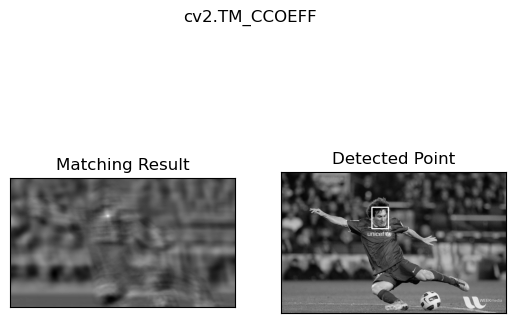

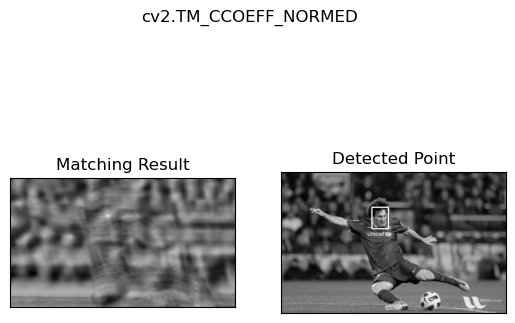

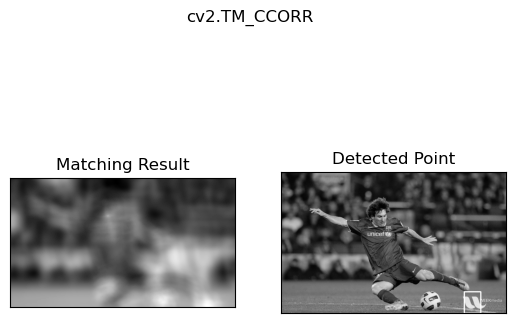

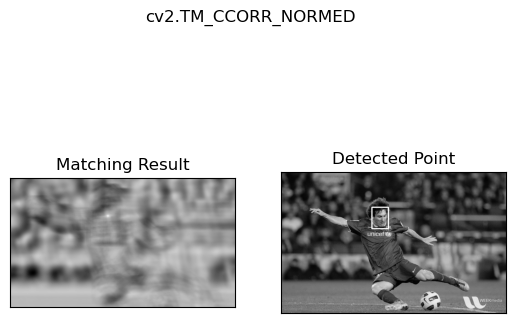

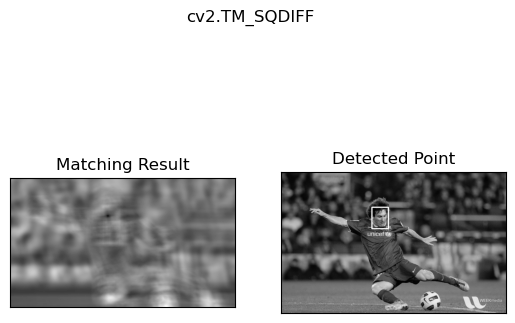

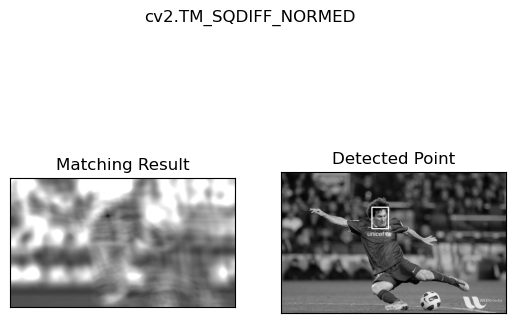

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('messi_face.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### `Template Matching with Multiple Objects`

In the previous section, we searched image for Messi's face, which occurs only once in the image. Suppose you are searching for an object which has multiple occurances, cv2.minMaxLoc() won't give you all the locations. In that case, we will use thresholding. So in this example, we will use a screenshot of the famous game Mario and we will find the coins in it.

In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_template.jpg',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imwrite('res2.png',img_rgb)

True

## Hough Line Transform

### `Goal`

In this chapter,

* We will understand the concept of the Hough Transform.
* We will see how to use it to detect lines in an image.
* We will see the following functions: cv2.HoughLines(), cv2.HoughLinesP()

### `Theory`

The Hough Transform is a popular technique to detect any shape, if you can represent that shape in a mathematical form. It can detect the shape even if it is broken or distorted a little bit. We will see how it works for a line.

A line can be represented as y=mx+c or in a parametric form, as ρ=xcosθ+ysinθ where ρ is the perpendicular distance from the origin to the line, and θ is the angle formed by this perpendicular line and the horizontal axis measured in counter-clockwise (That direction varies on how you represent the coordinate system. This representation is used in OpenCV). Check the image below:

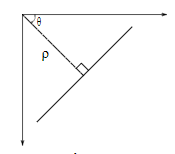

So if the line is passing below the origin, it will have a positive rho and an angle less than 180. If it is going above the origin, instead of taking an angle greater than 180, the angle is taken less than 180, and rho is taken negative. Any vertical line will have 0 degree and horizontal lines will have 90 degree.

Now let's see how the Hough Transform works for lines. Any line can be represented in these two terms, (ρ,θ). So first it creates a 2D array or accumulator (to hold the values of the two parameters) and it is set to 0 initially. Let rows denote the ρ and columns denote the θ. Size of array depends on the accuracy you need. Suppose you want the accuracy of angles to be 1 degree, you will need 180 columns. For ρ, the maximum distance possible is the diagonal length of the image. So taking one pixel accuracy, the number of rows can be the diagonal length of the image.

### `Hough Transform in OpenCV`

Everything explained above is encapsulated in the OpenCV function, cv2.HoughLines(). It simply returns an array of :math:(rho, theta)` values. ρ is measured in pixels and θ is measured in radians. First parameter, Input image should be a binary image, so apply threshold or use canny edge detection before applying hough transform. Second and third parameters are ρ and θ accuracies respectively. Fourth argument is the threshold, which means the minimum vote it should get to be considered as a line. Remember, number of votes depends upon the number of points on the line. So it represents the minimum length of line that should be detected.

In [20]:
import cv2
import numpy as np
img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('houghlines3.jpg',img)

True

### `Probabilistic Hough Transform`

In the hough transform, you can see that even for a line with two arguments, it takes a lot of computation. Probabilistic Hough Transform is an optimization of the Hough Transform we saw. It doesn't take all the points into consideration. Instead, it takes only a random subset of points which is sufficient for line detection. Just we have to decrease the threshold. See image below which compares Hough Transform and Probabilistic Hough Transform in Hough space. 

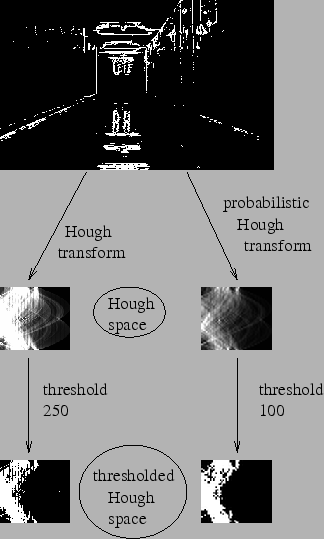

OpenCV implementation is based on Robust Detection of Lines Using the Progressive Probabilistic Hough Transform by Matas, J. and Galambos, C. and Kittler, J.V. [115]. The function used is cv2.HoughLinesP(). It has two new arguments.

minLineLength - Minimum length of line. Line segments shorter than this are rejected.
maxLineGap - Maximum allowed gap between line segments to treat them as a single line.
Best thing is that, it directly returns the two endpoints of lines. In previous case, you got only the parameters of lines, and you had to find all the points. Here, everything is direct and simple.

In [21]:
import cv2
import numpy as np
img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imwrite('houghlines5.jpg',img)

True

## Hough Circle Transform

### `Goal`

In this chapter,

* We will learn to use Hough Transform to find circles in an image.
* We will see these functions: cv2.HoughCircles()

### `Theory`

A circle is represented mathematically as (x−xcenter)2+(y−ycenter)2=r2 where (xcenter,ycenter) is the center of the circle, and r is the radius of the circle. From equation, we can see we have 3 parameters, so we need a 3D accumulator for hough transform, which would be highly ineffective. So OpenCV uses more trickier method, Hough Gradient Method which uses the gradient information of edges.

The function we use here is cv2.HoughCircles(). It has plenty of arguments which are well explained in the documentation. So we directly go to the code

In [22]:
import cv2
import numpy as np
img = cv2.imread('opencv-logo-white.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image Segmentation with Watershed Algorithm

### `Goal`

In this chapter,

* We will learn to use marker-based image segmentation using watershed algorithm
* We will see: cv2.watershed()

### `Theory`

Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys. You start filling every isolated valleys (local minima) with different colored water (labels). As the water rises, depending on the peaks (gradients) nearby, water from different valleys, obviously with different colors will start to merge. To avoid that, you build barriers in the locations where water merges. You continue the work of filling water and building barriers until all the peaks are under water. Then the barriers you created gives you the segmentation result. This is the "philosophy" behind the watershed. You can visit the CMM webpage on watershed to understand it with the help of some animations.

But this approach gives you oversegmented result due to noise or any other irregularities in the image. So OpenCV implemented a marker-based watershed algorithm where you specify which are all valley points are to be merged and which are not. It is an interactive image segmentation. What we do is to give different labels for our object we know. Label the region which we are sure of being the foreground or object with one color (or intensity), label the region which we are sure of being background or non-object with another color and finally the region which we are not sure of anything, label it with 0. That is our marker. Then apply watershed algorithm. Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.

### `Code`

Below we will see an example on how to use the Distance Transform along with watershed to segment mutually touching objects.

Consider the coins image below, the coins are touching each other. Even if you threshold it, it will be touching each other.

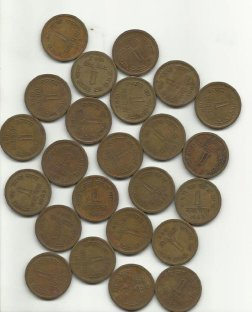

We start with finding an approximate estimate of the coins. For that, we can use the Otsu's binarization.

In [104]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

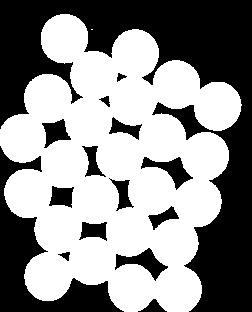

Now we need to remove any small white noises in the image. For that we can use morphological opening. To remove any small holes in the object, we can use morphological closing. So, now we know for sure that region near to center of objects are foreground and region much away from the object are background. Only region we are not sure is the boundary region of coins.

So we need to extract the area which we are sure they are coins. Erosion removes the boundary pixels. So whatever remaining, we can be sure it is coin. That would work if objects were not touching each other. But since they are touching each other, another good option would be to find the distance transform and apply a proper threshold. Next we need to find the area which we are sure they are not coins. For that, we dilate the result. Dilation increases object boundary to background. This way, we can make sure whatever region in background in result is really a background, since boundary region is removed. See the image below.

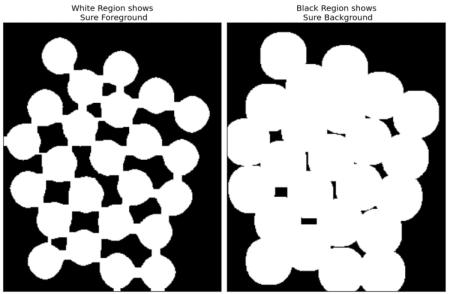

The remaining regions are those which we don't have any idea, whether it is coins or background. Watershed algorithm should find it. These areas are normally around the boundaries of coins where foreground and background meet (Or even two different coins meet). We call it border. It can be obtained from subtracting sure_fg area from sure_bg area.

In [105]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

See the result. In the thresholded image, we get some regions of coins which we are sure of coins and they are detached now. (In some cases, you may be interested in only foreground segmentation, not in separating the mutually touching objects. In that case, you need not use distance transform, just erosion is sufficient. Erosion is just another method to extract sure foreground area, that's all.)

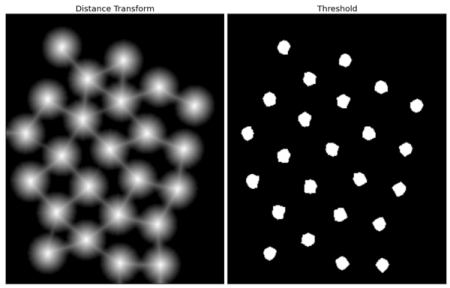

Now we know for sure which are region of coins, which are background and all. So we create marker (it is an array of same size as that of original image, but with int32 datatype) and label the regions inside it. The regions we know for sure (whether foreground or background) are labelled with any positive integers, but different integers, and the area we don't know for sure are just left as zero. For this we use cv2.connectedComponents(). It labels background of the image with 0, then other objects are labelled with integers starting from 1.

But we know that if background is marked with 0, watershed will consider it as unknown area. So we want to mark it with different integer. Instead, we will mark unknown region, defined by unknown, with 0.

In [106]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

See the result shown in JET colormap. The dark blue region shows unknown region. Sure coins are colored with different values. Remaining area which are sure background are shown in lighter blue compared to unknown region.

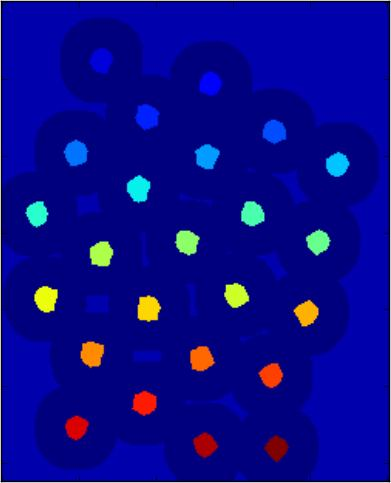

Now our marker is ready. It is time for final step, apply watershed. Then marker image will be modified. The boundary region will be marked with -1.



In [107]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

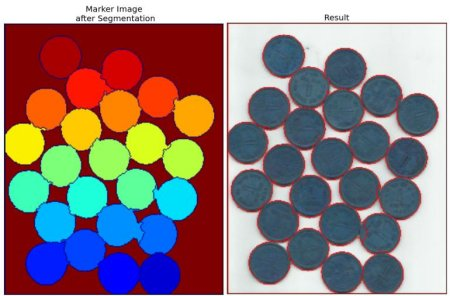

## Interactive Foreground Extraction using GrabCut Algorithm

### `Goal`

In this chapter

* We will see GrabCut algorithm to extract foreground in images
* We will create an interactive application for this.

### `Theory`

GrabCut algorithm was designed by Carsten Rother, Vladimir Kolmogorov & Andrew Blake from Microsoft Research Cambridge, UK. in their paper, "GrabCut": interactive foreground extraction using iterated graph cuts . An algorithm was needed for foreground extraction with minimal user interaction, and the result was GrabCut.

How it works from user point of view ? Initially user draws a rectangle around the foreground region (foreground region should be completely inside the rectangle). Then algorithm segments it iteratively to get the best result. Done. But in some cases, the segmentation won't be fine, like, it may have marked some foreground region as background and vice versa. In that case, user need to do fine touch-ups. Just give some strokes on the images where some faulty results are there. Strokes basically says *"Hey, this region should be foreground, you marked it background, correct it in next iteration"* or its opposite for background. Then in the next iteration, you get better results.

See the image below. First player and football is enclosed in a blue rectangle. Then some final touchups with white strokes (denoting foreground) and black strokes (denoting background) is made. And we get a nice result.

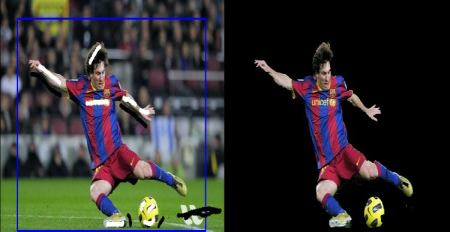

So what happens in background ?

* User inputs the rectangle. Everything outside this rectangle will be taken as sure background (That is the reason it is mentioned before that your rectangle should include all the objects). Everything inside rectangle is unknown. Similarly any user input specifying foreground and background are considered as hard-labelling which means they won't change in the process.
* Computer does an initial labelling depeding on the data we gave. It labels the foreground and background pixels (or it hard-labels)
* Now a Gaussian Mixture Model(GMM) is used to model the foreground and background.
* Depending on the data we gave, GMM learns and create new pixel distribution. That is, the unknown pixels are labelled either probable foreground or probable background depending on its relation with the other hard-labelled pixels in terms of color statistics (It is just like clustering).
* A graph is built from this pixel distribution. Nodes in the graphs are pixels. Additional two nodes are added, Source node and Sink node. Every foreground pixel is connected to Source node and every background pixel is connected to Sink node.
* The weights of edges connecting pixels to source node/end node are defined by the probability of a pixel being foreground/background. The weights between the pixels are defined by the edge information or pixel similarity. If there is a large difference in pixel color, the edge between them will get a low weight.
* Then a mincut algorithm is used to segment the graph. It cuts the graph into two separating source node and sink node with minimum cost function. The cost function is the sum of all weights of the edges that are cut. After the cut, all the pixels connected to Source node become foreground and those connected to Sink node become background.
* The process is continued until the classification converges.



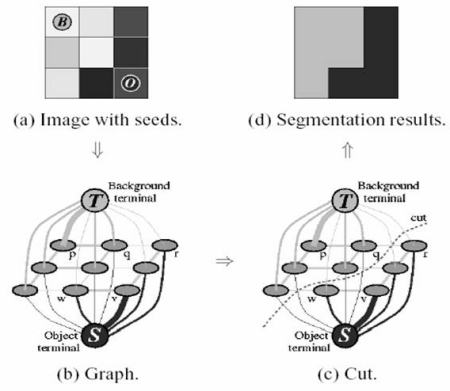

### `Demo`

Now we go for grabcut algorithm with OpenCV. OpenCV has the function, cv2.grabCut() for this. We will see its arguments first:

* img - Input image
* mask - It is a mask image where we specify which areas are background, foreground or probable background/foreground etc. It is done by the following flags, cv2.GC_BGD, cv2.GC_FGD, cv2.GC_PR_BGD, cv2.GC_PR_FGD, or simply pass 0,1,2,3 to image.
*  rect - It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
bdgModel, fgdModel - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).
* iterCount - Number of iterations the algorithm should run.
* mode - It should be cv2.GC_INIT_WITH_RECT or cv2.GC_INIT_WITH_MASK or combined which decides whether we are drawing rectangle or final touchup strokes.

First let's see with rectangular mode. We load the image, create a similar mask image. We create fgdModel and bgdModel. We give the rectangle parameters. It's all straight-forward. Let the algorithm run for 5 iterations. Mode should be cv2.GC_INIT_WITH_RECT since we are using rectangle. Then run the grabcut. It modifies the mask image. In the new mask image, pixels will be marked with four flags denoting background/foreground as specified above. So we modify the mask such that all 0-pixels and 2-pixels are put to 0 (ie background) and all 1-pixels and 3-pixels are put to 1(ie foreground pixels). Now our final mask is ready. Just multiply it with input image to get the segmented image.

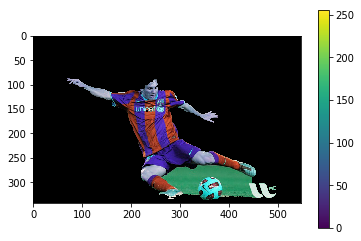

(<matplotlib.image.AxesImage at 0x18b2a16ad68>,
 None)

In [115]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()